# International Powerlifting Federation (IPF)
### Exploratory Data Analysis on 2018-2024 competition

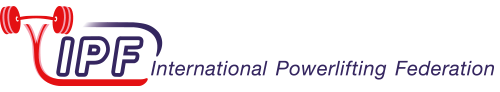
###### Credits: https://www.powerlifting.sport/

### What is powerlifting?
##### Powerlifting is a competitive strength sport that focuses on three primary lifts: the squat, bench press, and deadlift. Participants in powerlifting competitions, known as powerlifters, aim to lift as much weight as possible in each of these three lifts within specific weight categories and age divisions

### About the Data
##### The dataset, obtained from the reputable OpenPowerlifting project (https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html), consists of over 1.2 million competition records from the International Powerlifting Federation (IPF). It includes detailed information about powerlifting competitions, athlete profiles, and their respective performances across various weight categories and age divisions.

### Introduction
##### Through this analysis, we will delve into several key areas, such as identifying record-breaking performances, examining the participation and representation of different demographics, and exploring the evolution of powerlifting over time. By uncovering these insights, we aim to provide a comprehensive understanding of this captivating strength sport and its dedicated community of athletes.

 <hr>

## Data Wrangling
##### I will start by setting up the environment, loading the dataset, and performing an initial assessment of its contents. Following that, we will proceed with cleaning and processing the data to make it suitable for analysis.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read in file
df = pd.read_csv("../openipf-2024-02-24/openipf-2024-02-24.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_22244\3173043467.py:2: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../openipf-2024-02-24/openipf-2024-02-24.csv")


In [3]:
# See the data that's been imported
df.head()

Name Sex Event   Equipment   Age AgeClass BirthYearClass   Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested      Country State Federation ParentFederation        Date  MeetCountry MeetState  MeetTown               MeetName
0   Karen Thomson   F   SBD  Single-ply  39.5    35-39          40-49  Masters 1         51.90            52     105.0     110.5    -115.0       NaN         110.5      67.5      70.5      72.5       NaN          72.5        125.0        130.0       -136.0          NaN            130.0    312.5     1  381.42  390.15        345.86     63.73    Yes  New Zealand   NaN  OceaniaPF              IPF  2002-12-06  New Zealand       BOP  Tauranga  Oceania Championships
1  Deborah Groves   F   SBD  Single-ply  30.5    24-34          24-39       Open         50.64            52     122.5    -127.5     127.5       NaN         127.5      82.5      87.5      90.0       NaN          90.0        140.0        152.5       -157.0          NaN            152.5    370.0     1  459.45  470.74        417.74     76.76    Yes    Australia   NaN  OceaniaPF              IPF  2002-12-06  New Zealand       BOP  Tauranga  Oceania Championships
2     Renee Orbon   F   SBD  Single-ply  31.5    24-34          24-39       Open         55.76            56     105.5     110.0     115.0       NaN         115.0      82.5      85.0      87.5       NaN          87.5        127.5        132.5        137.5          NaN            137.5    340.0     1  395.22  401.40        355.08     66.09    Yes  New Zealand   NaN  OceaniaPF              IPF  2002-12-06  New Zealand       BOP  Tauranga  Oceania Championships
3  Rikki Flanders   F   SBD  Single-ply  31.5    24-34          24-39       Open         56.42            60     110.0     117.5    -120.0       NaN         117.5      62.5     -65.0     -65.0       NaN          62.5        130.0        137.5        140.0          NaN            140.0    320.0     1  369.09  374.31        331.05     61.74    Yes    Australia   NaN  OceaniaPF              IPF  2002-12-06  New Zealand       BOP  Tauranga  Oceania Championships
4  Julie Hallmond   F   SBD  Single-ply   NaN      NaN          50-59  Masters 2         58.20            60     105.0     110.0     112.5       NaN         112.5      57.5      60.0      62.5       NaN          62.5        135.0        137.5        141.0          NaN            141.0    316.0     1  357.17  360.76        318.88     59.79    Yes  New Zealand   NaN  OceaniaPF              IPF  2002-12-06  New Zealand       BOP  Tauranga  Oceania Championships

In [4]:
df.shape

(1228685, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228685 entries, 0 to 1228684
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1228685 non-null  object 
 1   Sex               1228685 non-null  object 
 2   Event             1228685 non-null  object 
 3   Equipment         1228685 non-null  object 
 4   Age               890357 non-null   float64
 5   AgeClass          933647 non-null   object 
 6   BirthYearClass    949116 non-null   object 
 7   Division          1227735 non-null  object 
 8   BodyweightKg      1214221 non-null  float64
 9   WeightClassKg     1215634 non-null  object 
 10  Squat1Kg          488458 non-null   float64
 11  Squat2Kg          483645 non-null   float64
 12  Squat3Kg          471823 non-null   float64
 13  Squat4Kg          327 non-null      float64
 14  Best3SquatKg      884070 non-null   float64
 15  Bench1Kg          690577 non-null   float64
 16  

<hr> 

## Data Preparation

### 1. Filter data only from 2018-2024
### 2. Only include events that include all 3 movements: Squat, Bench and Deadlift, aka SBD events. 
### 3. Fliter competition meets that does not use any supportive equipment
### 4. Filter divisions to include: Sub Juniors, Juniors, Opens, and Masters 1-4
### 5. Clean meet results for squat, bench and deadlift
### 6. Clean weight classes
### 7. Clean other columns such as Federation, MeetState, MeetTown etc.
### 8. Removing duplicates

<hr> 

### Step 1: Show 2018-2024

In [6]:
df['Date']

0          2002-12-06
1          2002-12-06
2          2002-12-06
3          2002-12-06
4          2002-12-06
              ...    
1228680    2016-11-14
1228681    2016-11-14
1228682    2016-11-14
1228683    2016-11-14
1228684    2016-11-14
Name: Date, Length: 1228685, dtype: object

In [7]:
# Since dtype is object, convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

In [9]:
# Filtering to 2020-2024
df2 = df[df['Year'].between(2018, 2024)]

In [10]:
# Sort out values
df2 = df2.sort_values(by='Year', ascending=True)
df2 = df2.reset_index(drop=True)

In [11]:
df2.head(10)

Name Sex Event   Equipment   Age AgeClass BirthYearClass   Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState MeetTown              MeetName  Year
0      Taran Dhanju   F   SBD         Raw  44.5    40-44          40-49  Masters 1          63.0            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09      Canada        ON  Niagara          Niagara Open  2018
1  Patrick Mitchell   M    BD  Single-ply  41.5    40-44          40-49        M-O         115.2           120       NaN       NaN       NaN       NaN           NaN    -200.0    -200.0    -200.0       NaN           NaN        205.0        215.0       -227.5          NaN            215.0      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
2   Jeffrey Skorupa   M    BD  Single-ply  52.5    50-54          50-59      M-M2a         121.4          120+       NaN       NaN       NaN       NaN           NaN     220.0     232.5     242.5       NaN         242.5        215.0        230.0        245.0          NaN            245.0    487.5     1  278.90  279.53        267.86       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
3      Janan Khalil   F    BD         Raw  15.5    16-17          14-18      FR-T2          84.7           84+       NaN       NaN       NaN       NaN           NaN      55.0      62.5     -65.0       NaN          62.5        137.5        152.5        160.0          NaN            160.0    222.5     1  203.93  197.60        172.65       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
4      Megan Sisson   F    BD         Raw  15.5    16-17          14-18      FR-T2          68.5            72       NaN       NaN       NaN       NaN           NaN      55.0     -57.5     -57.5       NaN          55.0        122.5        127.5        132.5          NaN            132.5    187.5     1  191.95  189.37        167.01       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
5    Angelina Selou   F    BD         Raw  19.5    20-23          19-23       FR-O          88.4           84+       NaN       NaN       NaN       NaN           NaN      40.0     -45.0     -45.0       NaN          40.0         85.0         92.5        100.0          NaN            100.0    140.0     5  125.82  121.90        106.13       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
6     Lana Goodrich   F    BD         Raw  34.5    24-34          24-39       FR-O         107.1           84+       NaN       NaN       NaN       NaN           NaN      55.0     -60.0      60.0       NaN          60.0        107.5          NaN          NaN          NaN            107.5    167.5     4  139.35  136.99        116.72       NaN    Yes     USA    MI      USAPL              IPF 2018-10-13         USA        MI      NaN  Michigan Iron Monger  2018
7         Noel Gray   F    BD         Raw  45.5    45-49          40-49       FR-O         142.7           84+       NaN       NaN       NaN       NaN           NaN      57.5      62.5     -70.0       NaN          62.5        105.0        112.5        120.0          NaN            120.0    182.5     3  141.24  141.44 

In [12]:
df2.shape

(390850, 42)

<hr> 

### Step 2: Filter events that include all 3 movements: Squat, Bench and Deadlift (SBD events)

In [13]:
df2['Event'].unique()

array(['SBD', 'BD', 'D', 'B', 'SB', 'S', 'SD'], dtype=object)

In [14]:
df2[df2['Event'].str.contains('SBD')]

Name Sex Event Equipment   Age AgeClass BirthYearClass     Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState  MeetTown            MeetName  Year
0            Taran Dhanju   F   SBD       Raw  44.5    40-44          40-49    Masters 1         63.00            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09      Canada        ON   Niagara        Niagara Open  2018
53           Bryan Sledge   M   SBD       Raw  18.5    18-19          19-23        MR-T3         81.10            83     110.0     125.0     132.5       NaN         132.5    -100.0     100.0       NaN       NaN         100.0        175.0        195.0        205.0          NaN            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
54         Robert Stolley   M   SBD       Raw  26.5    24-34          24-39         MR-O        212.00          120+    -172.5     172.5     190.0       NaN         190.0    -105.0    -105.0    -105.0       NaN           NaN       -215.0       -215.0       -215.0          NaN              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
55      Patrick Mcconnell   M   SBD       Raw  22.5    20-23          19-23         MR-O        125.50          120+     150.0     165.0    -177.5       NaN         165.0     115.0     125.0     127.5       NaN         127.5        225.0        242.5        252.5          NaN            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
56             Mike Kracl   M   SBD       Raw  29.5    24-34          24-39         MR-O        126.80          120+     247.5     262.5     272.5       NaN         272.5     162.5     170.0    -177.5       NaN         170.0        257.5        272.5        285.0          NaN            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
...                   ...  ..   ...       ...   ...      ...            ...          ...           ...           ...       ...       ...       ...       ...           ...       ...       ...       ...       ...           ...          ...          ...          ...          ...              ...      ...   ...     ...     ...           ...       ...    ...     ...   ...        ...              ...        ...         ...       ...       ...                 ...   ...
390845     Elise Turcotte   F   SBD       Raw   NaN      NaN            NaN         Open         91.89           84+      82.5      87.5      95.0       NaN          95.0      47.5     -52.5      55.0       NaN          55.0        120.0        130.0        135.0          NaN            135.0    285.0     5  251.79  244.21        211.84     52.12    Yes  Canada    AB        CPU              IPF 2024-01-20      Canada        AB  Edmonton     Grit Power Open  2024
390846       David Dacong   M   SBD       Raw   NaN    20-23          19-23      Juniors         65.13            66     160.0     172.5     177.5       NaN         177.5     105.0    -115.0    -120.0       NaN         105.0        170.0        175.0        182.5          NaN         

In [15]:
# Update Dataframe
df2 = df2[df2['Event'].str.contains('SBD')]

 <hr>

### Step 3: Filter competition meets that does not use any supportive equipment

In [16]:
df2['Equipment'].unique()

array(['Raw', 'Single-ply', 'Wraps'], dtype=object)

In [17]:
df2[df2['Equipment'].str.contains('Raw')]

Name Sex Event Equipment   Age AgeClass BirthYearClass     Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState  MeetTown            MeetName  Year
0            Taran Dhanju   F   SBD       Raw  44.5    40-44          40-49    Masters 1         63.00            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09      Canada        ON   Niagara        Niagara Open  2018
53           Bryan Sledge   M   SBD       Raw  18.5    18-19          19-23        MR-T3         81.10            83     110.0     125.0     132.5       NaN         132.5    -100.0     100.0       NaN       NaN         100.0        175.0        195.0        205.0          NaN            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
54         Robert Stolley   M   SBD       Raw  26.5    24-34          24-39         MR-O        212.00          120+    -172.5     172.5     190.0       NaN         190.0    -105.0    -105.0    -105.0       NaN           NaN       -215.0       -215.0       -215.0          NaN              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
55      Patrick Mcconnell   M   SBD       Raw  22.5    20-23          19-23         MR-O        125.50          120+     150.0     165.0    -177.5       NaN         165.0     115.0     125.0     127.5       NaN         127.5        225.0        242.5        252.5          NaN            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
56             Mike Kracl   M   SBD       Raw  29.5    24-34          24-39         MR-O        126.80          120+     247.5     262.5     272.5       NaN         272.5     162.5     170.0    -177.5       NaN         170.0        257.5        272.5        285.0          NaN            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE       NaN  Capital City Clash  2018
...                   ...  ..   ...       ...   ...      ...            ...          ...           ...           ...       ...       ...       ...       ...           ...       ...       ...       ...       ...           ...          ...          ...          ...          ...              ...      ...   ...     ...     ...           ...       ...    ...     ...   ...        ...              ...        ...         ...       ...       ...                 ...   ...
390845     Elise Turcotte   F   SBD       Raw   NaN      NaN            NaN         Open         91.89           84+      82.5      87.5      95.0       NaN          95.0      47.5     -52.5      55.0       NaN          55.0        120.0        130.0        135.0          NaN            135.0    285.0     5  251.79  244.21        211.84     52.12    Yes  Canada    AB        CPU              IPF 2024-01-20      Canada        AB  Edmonton     Grit Power Open  2024
390846       David Dacong   M   SBD       Raw   NaN    20-23          19-23      Juniors         65.13            66     160.0     172.5     177.5       NaN         177.5     105.0    -115.0    -120.0       NaN         105.0        170.0        175.0        182.5          NaN         

In [18]:
# Update Dataframe
df2 = df2[df2['Equipment'].str.contains('Raw')]

In [19]:
df2.head()

Name Sex Event Equipment   Age AgeClass BirthYearClass   Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState MeetTown            MeetName  Year
0        Taran Dhanju   F   SBD       Raw  44.5    40-44          40-49  Masters 1          63.0            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09      Canada        ON  Niagara        Niagara Open  2018
53       Bryan Sledge   M   SBD       Raw  18.5    18-19          19-23      MR-T3          81.1            83     110.0     125.0     132.5       NaN         132.5    -100.0     100.0       NaN       NaN         100.0        175.0        195.0        205.0          NaN            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018
54     Robert Stolley   M   SBD       Raw  26.5    24-34          24-39       MR-O         212.0          120+    -172.5     172.5     190.0       NaN         190.0    -105.0    -105.0    -105.0       NaN           NaN       -215.0       -215.0       -215.0          NaN              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018
55  Patrick Mcconnell   M   SBD       Raw  22.5    20-23          19-23       MR-O         125.5          120+     150.0     165.0    -177.5       NaN         165.0     115.0     125.0     127.5       NaN         127.5        225.0        242.5        252.5          NaN            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018
56         Mike Kracl   M   SBD       Raw  29.5    24-34          24-39       MR-O         126.8          120+     247.5     262.5     272.5       NaN         272.5     162.5     170.0    -177.5       NaN         170.0        257.5        272.5        285.0          NaN            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018

 <hr>

### Step 4: Filter age divisions to include: Sub Juniors, Juniors, Opens, and Masters 1-3

#### This is what i gathered from the ipf technical rules book (pg.3,4)
#### Credits: https://www.powerlifting.sport/fileadmin/ipf/data/rules/technical-rules/english/IPF_Technical_Rules_Book_2021docx.pdf

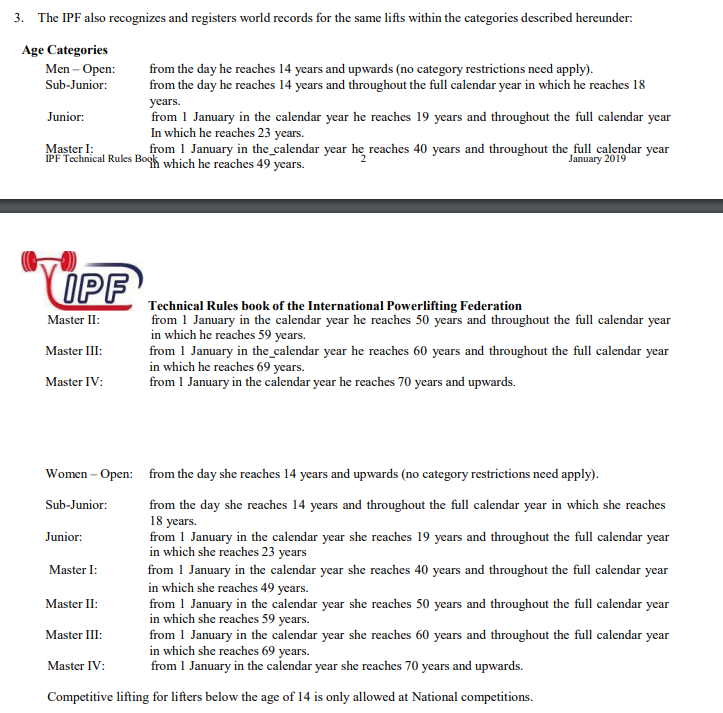

In [20]:
df2['BirthYearClass'].unique()

array(['40-49', '19-23', '24-39', '14-18', '50-59', nan, '70-999',
       '60-69'], dtype=object)

In [21]:
# Filtering null values for birthyearclass 
df2[df2['BirthYearClass'].isnull()]

Name Sex Event Equipment   Age AgeClass BirthYearClass     Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState  MeetTown                                           MeetName  Year
129          Logan Auerbach   M   SBD       Raw  10.5     5-12            NaN        MR-Y2         47.90            48      47.5      52.5      57.5       NaN          57.5      37.5      40.0      42.5       NaN          42.5         75.0         80.0         82.5          NaN             82.5    182.5     1  189.55  195.79        193.67     33.78    Yes     USA    OH      USAPL              IPF 2018-08-04         USA        OH       NaN                    Dog Days of Summer Powerlifting  2018
200          Svetlana Burko   F   SBD       Raw  12.5    13-15            NaN  Sub-Juniors         31.05            43       NaN       NaN       NaN       NaN          47.5       NaN       NaN       NaN       NaN          32.5          NaN          NaN          NaN          NaN             65.0    145.0     5  215.30  239.31        233.52       NaN    Yes     NaN   NaN        FPR              IPF 2018-04-18      Russia       TUL      Tula  Russian Sports Schools Classic Powerlifting Ch...  2018
202         Arina Netrusova   F   SBD       Raw  12.5    13-15            NaN  Sub-Juniors         41.75            43       NaN       NaN       NaN       NaN          65.0       NaN       NaN       NaN       NaN          35.0          NaN          NaN          NaN          NaN             75.0    175.0     3  251.10  254.86        230.12     55.13    Yes     NaN   NaN        FPR              IPF 2018-04-18      Russia       TUL      Tula  Russian Sports Schools Classic Powerlifting Ch...  2018
203          Darya Antonova   F   SBD       Raw  12.5    13-15            NaN  Sub-Juniors         41.95            43       NaN       NaN       NaN       NaN          85.0       NaN       NaN       NaN       NaN          55.0          NaN          NaN          NaN          NaN            105.0    245.0     1  350.21  355.75        321.01     76.75    Yes  Russia   NaN        FPR              IPF 2018-04-18      Russia       TUL      Tula  Russian Sports Schools Classic Powerlifting Ch...  2018
268         Jessica DeSousa   F   SBD       Raw   NaN      NaN            NaN         Open         60.20            63       NaN       NaN       NaN       NaN         110.0       NaN       NaN       NaN       NaN          60.0          NaN          NaN          NaN          NaN            140.0    310.0     3  342.93  344.73        304.57     69.91    Yes     NaN   NaN       VGPF              IPF 2018-09-22     Belgium       NaN  Merchtem  Vlaams Kampioenschap - Powerlifting & Bench Pr...  2018
...                     ...  ..   ...       ...   ...      ...            ...          ...           ...           ...       ...       ...       ...       ...           ...       ...       ...       ...       ...           ...          ...          ...          ...          ...              ...      ...   ...     ...     ...           ...       ...    ...     ...   ...        ...              ...        ...         ...       ...       ...                                                ...   ...
390842        Nicole Pepper   F   SBD       Raw   NaN      NaN            NaN         Open        100.51           84+    -107.5     110.0     120.0       NaN         120.0      70.0      77.5      82.5       NaN          82.5        130.0        140.0        145.0          NaN            145.0    347.5     2  295.95  288.90        248.02     61.89    Yes  Canada    AB        CPU              IPF 2024-01-20      Canada        AB  Edmonton                                    Grit Power Open  2024
390843       Rebecca Kr

In [22]:
#34288 null values is a significant amount, let's try filtering using divisions
df2['Division'].unique()

array(['Masters 1', 'MR-T3', 'MR-O', 'MR-M1b', 'MR-M1a', 'MR-T2', 'MR-Jr',
       'FR-T3', 'FR-T1', 'FR-O', 'MR-Y2', 'FR-Jr', 'Sub-Juniors',
       'FR-M2a', 'Juniors', 'Open', 'Masters 4', 'FR-T2', 'Masters 2',
       'Masters 3', 'FR-M1a', 'MR-M3a', 'MR-M4a', 'MR-M3b', 'FR-Y3',
       'FR-M1b', 'FR-M', 'FR-G', 'FR-T', 'MR-T', 'MR-M', 'MR-G', 'MR-M2b',
       'FR-M3a', 'MR-T1', 'High School', 'MR-M1', 'MR-C', 'MR-M2',
       'MR-PF', 'MR-M4', 'MR-M3', 'FR-M3', 'FR-M2', 'FR-M1', 'FR-M3b',
       'FR-Y2', 'FR-M2b', 'MR-M2a', 'FR-Y1', 'MR-M5a', 'FR-C', 'FR-M6a',
       'Juniorki do lat 18', 'Juniorki do lat 23', 'Juniorzy do lat 23',
       'MR-Y3', 'MR-Y1', 'Juniorzy do lat 18', 'FR-Y', 'MR-MO', 'MR-SO',
       'MR-Y', 'T18-19', 'M50-54', 'M45-49', 'T16-17', 'MR-HS', 'FR-HS',
       'FR-M4', 'Youth 10-13', 'Teen 14-15', 'Teen 16-17', 'M40-44',
       'M55-59', 'M-C-Open', 'M-C-U23', 'M-C-U18', 'F-C-M1', 'F-C-Open',
       'F-C-U23', 'F-C-U18', 'M-C-M1', 'M-C-M2', 'MR-JV', 'FR-JV', 'MR-V

In [23]:
df2['AgeClass'].unique()

array(['40-44', '18-19', '24-34', '20-23', '35-39', '45-49', '16-17',
       '13-15', '50-54', '5-12', '55-59', nan, '60-64', '70-74', '65-69',
       '75-79', '80-999'], dtype=object)

#### It would seem federations name their age divisions based on their justification rather than the IPF standards

#### Though not ideal, the best way is to remove the BirthYearClass data that contains null values as it would be impossible to justify age by Division or AgeClass. As examples, MR-T2, MR-C, HS, Prime Time are not indicative of age divisions but rather represent other categorizations such as weight classes or special divisions within the competition. Furthermore, the AgeClass contains values of varying degree, not following the IPF standards as well. Therefore, removing the rows where the 'BirthYearClass' data contains null values would be the most appropriate approach for ensuring consistency in age-based divisions across the dataset.

In [24]:
df2 = df2.dropna(subset=['BirthYearClass'])

In [25]:
# Check if NaN values are removed
df2['BirthYearClass'].unique()

array(['40-49', '19-23', '24-39', '14-18', '50-59', '70-999', '60-69'],
      dtype=object)

#### Now that's completed I will have to categorize each BirthYearClass to each original ipf rule book. 

In [26]:
# Create a dict to map each age range
age_cat_mapping = {
    '14-18': 'Sub-Junior',
    '19-23': 'Junior',
    '24-39': 'Opens',
    '40-49': 'Master 1',
    '50-59': 'Master 2',
    '60-69': 'Master 3',
    '70-999': 'Master 4',
}
# Map the age categories to the 'BirthYearClass' column
df2['AgeDivision'] = df2['BirthYearClass'].map(age_cat_mapping)

In [27]:
df2.head()

Name Sex Event Equipment   Age AgeClass BirthYearClass   Division  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date MeetCountry MeetState MeetTown            MeetName  Year AgeDivision
0        Taran Dhanju   F   SBD       Raw  44.5    40-44          40-49  Masters 1          63.0            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09      Canada        ON  Niagara        Niagara Open  2018    Master 1
53       Bryan Sledge   M   SBD       Raw  18.5    18-19          19-23      MR-T3          81.1            83     110.0     125.0     132.5       NaN         132.5    -100.0     100.0       NaN       NaN         100.0        175.0        195.0        205.0          NaN            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018      Junior
54     Robert Stolley   M   SBD       Raw  26.5    24-34          24-39       MR-O         212.0          120+    -172.5     172.5     190.0       NaN         190.0    -105.0    -105.0    -105.0       NaN           NaN       -215.0       -215.0       -215.0          NaN              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018       Opens
55  Patrick Mcconnell   M   SBD       Raw  22.5    20-23          19-23       MR-O         125.5          120+     150.0     165.0    -177.5       NaN         165.0     115.0     125.0     127.5       NaN         127.5        225.0        242.5        252.5          NaN            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018      Junior
56         Mike Kracl   M   SBD       Raw  29.5    24-34          24-39       MR-O         126.8          120+     247.5     262.5     272.5       NaN         272.5     162.5     170.0    -177.5       NaN         170.0        257.5        272.5        285.0          NaN            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24         USA        NE      NaN  Capital City Clash  2018       Opens

In [28]:
# Now that Age, AgeClass, BirthYearClass, and Division are not needed, lets remove these columns
# I will also shift columns
df2 = df2[['Name', 'Sex', 'Event', 'Equipment', 
           #'Age', 
           #'AgeClass', 
           'AgeDivision', 
           #'BirthYearClass', 'Division'
           'BodyweightKg', 'WeightClassKg', 
           'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 
           'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
           'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 
           'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift', 'Tested', 
           'Country', 'State', 'Federation', 'ParentFederation', 'Date', 'Year', 'MeetCountry', 
           'MeetState', 'MeetTown', 'MeetName']].copy()

df2 = df2.reset_index(drop=True)

In [29]:
df2.head()

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63       NaN       NaN       NaN       NaN          90.0       NaN       NaN       NaN       NaN          40.0          NaN          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09  2018      Canada        ON  Niagara        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83     110.0     125.0     132.5       NaN         132.5    -100.0     100.0       NaN       NaN         100.0        175.0        195.0        205.0          NaN            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+    -172.5     172.5     190.0       NaN         190.0    -105.0    -105.0    -105.0       NaN           NaN       -215.0       -215.0       -215.0          NaN              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+     150.0     165.0    -177.5       NaN         165.0     115.0     125.0     127.5       NaN         127.5        225.0        242.5        252.5          NaN            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+     247.5     262.5     272.5       NaN         272.5     162.5     170.0    -177.5       NaN         170.0        257.5        272.5        285.0          NaN            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233172 entries, 0 to 233171
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Name              233172 non-null  object        
 1   Sex               233172 non-null  object        
 2   Event             233172 non-null  object        
 3   Equipment         233172 non-null  object        
 4   AgeDivision       233172 non-null  object        
 5   BodyweightKg      232702 non-null  float64       
 6   WeightClassKg     231454 non-null  object        
 7   Squat1Kg          201077 non-null  float64       
 8   Squat2Kg          199716 non-null  float64       
 9   Squat3Kg          196419 non-null  float64       
 10  Squat4Kg          0 non-null       float64       
 11  Best3SquatKg      229187 non-null  float64       
 12  Bench1Kg          200652 non-null  float64       
 13  Bench2Kg          199458 non-null  float64       
 14  Benc

<hr>

### Step 5: Clean competition results. This will include the squat, bench and deadlift columns

#### A lifter's powerlifting meet is calculated as such (Taken from pg3 of the IPF Rules Book):
#### Each competitor is allowed three attempts on each lift. The lifter’s best valid attempt on each lift counts toward his competition total. If two or more lifters achieve the same total, the lighter lifter ranks above the heavier lifter.

#### From the data, each lifter will have three attempts of each movement. Noted as Squat1kg for first attempt, and Squat3Kg for 3rd attempts etc. Howeover, Squat4Kg, Bench4Kg and Deadlift4Kg all contains null values. This is because lifters may take a 4th attempt on a world record lift. I can remove those columns

In [31]:
df2 = df2.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'], axis=1)

In [32]:
df2.head()

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63       NaN       NaN       NaN          90.0       NaN       NaN       NaN          40.0          NaN          NaN          NaN            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09  2018      Canada        ON  Niagara        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83     110.0     125.0     132.5         132.5    -100.0     100.0       NaN         100.0        175.0        195.0        205.0            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+    -172.5     172.5     190.0         190.0    -105.0    -105.0    -105.0           NaN       -215.0       -215.0       -215.0              NaN      NaN    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+     150.0     165.0    -177.5         165.0     115.0     125.0     127.5         127.5        225.0        242.5        252.5            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+     247.5     262.5     272.5         272.5     162.5     170.0    -177.5         170.0        257.5        272.5        285.0            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash

In [33]:
# Check null Values for competition numbers
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg           470
WeightClassKg         1718
Squat1Kg             32095
Squat2Kg             33456
Squat3Kg             36753
Best3SquatKg          3985
Bench1Kg             32520
Bench2Kg             33714
Bench3Kg             37684
Best3BenchKg          4786
Deadlift1Kg          32911
Deadlift2Kg          35142
Deadlift3Kg          39642
Best3DeadliftKg       4549
TotalKg               8771
Place                    0
Dots                  8799
Wilks                 8799
Glossbrenner          8799
Goodlift              8811
Tested                 220
Country              72326
State               142782
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           109020
MeetTown             76338
MeetName                 0
dtype: int64

In [34]:
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg           470
WeightClassKg         1718
Squat1Kg             32095
Squat2Kg             33456
Squat3Kg             36753
Best3SquatKg          3985
Bench1Kg             32520
Bench2Kg             33714
Bench3Kg             37684
Best3BenchKg          4786
Deadlift1Kg          32911
Deadlift2Kg          35142
Deadlift3Kg          39642
Best3DeadliftKg       4549
TotalKg               8771
Place                    0
Dots                  8799
Wilks                 8799
Glossbrenner          8799
Goodlift              8811
Tested                 220
Country              72326
State               142782
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           109020
MeetTown             76338
MeetName                 0
dtype: int64

In [35]:
# Check reason for TotalKg null values
df2[df2['TotalKg'].isnull()]

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Squat1Kg  Squat2Kg  Squat3Kg  Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Best3BenchKg  Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  TotalKg Place  Dots  Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState      MeetTown                                           MeetName
2              Robert Stolley   M   SBD       Raw       Opens        212.00          120+    -172.5     172.5     190.0         190.0    -105.0    -105.0    -105.0           NaN       -215.0       -215.0       -215.0              NaN      NaN    DQ   NaN    NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE           NaN                                 Capital City Clash
18                 Josh Davis   M   SBD       Raw      Junior         58.50            59    -132.5    -132.5    -132.5           NaN    -100.0    -105.0    -105.0           NaN        145.0        160.0       -177.5            160.0      NaN    DQ   NaN    NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE           NaN                                 Capital City Clash
63                Terri Whyte   F   SBD       Raw       Opens        163.29           84+       NaN       NaN       NaN           NaN      52.2     -59.0     -59.0          52.2         74.8         81.7         93.0             93.0      NaN    DQ   NaN    NaN           NaN       NaN    Yes     USA    AK      USAPL              IPF 2018-12-08  2018         USA        AK           NaN                  18th Annual Ketchikan Winter Meet
74           Kamila Devletova   F   SBD       Raw  Sub-Junior         63.00            63       NaN       NaN       NaN           NaN       NaN       NaN       NaN           NaN          NaN          NaN          NaN              NaN      NaN    DQ   NaN    NaN           NaN       NaN    Yes     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL          Tula  Russian Sports Schools Classic Powerlifting Ch...
75        Anastasiya Denisova   F   SBD       Raw  Sub-Junior         62.15            63       NaN       NaN       NaN           NaN       NaN       NaN       NaN           NaN          NaN          NaN          NaN              NaN      NaN    DQ   NaN    NaN           NaN       NaN    Yes  Russia   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL          Tula  Russian Sports Schools Classic Powerlifting Ch...
...                       ...  ..   ...       ...         ...           ...           ...       ...       ...       ...           ...       ...       ...       ...           ...          ...          ...          ...              ...      ...   ...   ...    ...           ...       ...    ...     ...   ...        ...              ...        ...   ...         ...       ...           ...                                                ...
233088           Mathys Payet   M   SBD       Raw      Junior         81.20            83     200.0     205.0    -210.0         205.0    -120.0    -120.0    -120.0           NaN       -220.0          NaN          NaN              NaN      NaN    DQ   NaN    NaN           NaN       NaN    Yes     NaN   NaN    FFForce              IPF 2024-01-27  2024      France       NaN  Saint-Joseph                                        Open du Sud
233090           Mélino Corre   M   SBD       Raw      Junior         73.40            74     165.0    -175.0    -175.0         165.0    -115.0    -120.0    -120.0           NaN       -170.0          NaN          NaN              NaN      NaN    DQ   NaN    NaN           NaN       NaN    Yes     NaN   NaN    FFForce              IPF 2024-01-27  2024      France       NaN  Saint-Joseph                                        Open du Sud
233126  Lohann Bouda Cambresy   M   SBD       Raw  Sub-Junior         63.4

#### From the data, I can derive that individuals who has a null value for TotalKg seems to have 'bombed out' from the meet. "Bombing out" in powerlifting refers to the situation where a competitor fails to record a successful lift in one or more of the three competition lifts: squat, bench press, and deadlift. If a lifter fails to complete a successful lift in any of the attempts for a particular lift, they receive no score for that lift, and if they fail to complete any successful lifts in all three lifts, they are said to have "bombed out" of the competition. This means they are unable to post a total and are disqualified from the competition standings. These numbers are denoted with a - infront of the competition numbers

In [36]:
# Change TotalKg null values to 0
df2['TotalKg'].fillna(0, inplace=True)

#### Additionally, I can remove columns of Squat1-3Kg, Bench1-3Kg and Deadlift1-3Kg as the data has provided with 'Best3____Kg' to determine the lifters' best lifts. These columns are not important because our EDA will only include the lifters best performance.

In [37]:
df2 = df2.drop(['Squat1Kg','Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg','Deadlift2Kg','Deadlift3Kg'], axis=1)

In [38]:
# Change Best3SquatKg, Best3BenchKg, Best3DeadliftKg null values to 0
df2 = df2.fillna({'Best3SquatKg': 0, 'Best3BenchKg': 0, 'Best3DeadliftKg': 0})

In [39]:
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg           470
WeightClassKg         1718
Best3SquatKg             0
Best3BenchKg             0
Best3DeadliftKg          0
TotalKg                  0
Place                    0
Dots                  8799
Wilks                 8799
Glossbrenner          8799
Goodlift              8811
Tested                 220
Country              72326
State               142782
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           109020
MeetTown             76338
MeetName                 0
dtype: int64

In [40]:
df2.head()

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63          90.0          40.0            142.5    272.5     1  293.08  292.65        258.42     59.62    Yes  Canada    ON        CPU              IPF 2018-06-09  2018      Canada        ON  Niagara        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83         132.5         100.0            205.0    437.5     1  299.28  296.15        285.17     61.28    Yes     USA    AK      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+         190.0           0.0              0.0      0.0    DQ     NaN     NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+         165.0         127.5            252.5    545.0     2  308.49  310.32        296.85     62.14    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+         272.5         170.0            285.0    727.5     1  410.47  413.39        395.42     82.59    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash

#### Let's check whether there are negative values for Best3SquatKg, Best3BenchKg, Best3DeadliftKg, as I assume some federations might have inputted the lifters failed attempt number into the dataset.

In [41]:
df2['Best3SquatKg'].min()

-300.0

#### It would seem that a negative value for Best3----Kg indicates that a lifter failed all three of the attempts for that specific movement. As TotalKg will indicate '0' if a lifter fails a lift, I can just change negative values from Best3----Kg to 0.

In [42]:
def replace_negative(x):
    if x < 0:
        return 0
    else:
        return x
    
df2['Best3SquatKg'] = df2['Best3SquatKg'].apply(replace_negative)
df2['Best3BenchKg'] = df2['Best3BenchKg'].apply(replace_negative)
df2['Best3DeadliftKg'] = df2['Best3DeadliftKg'].apply(replace_negative)

#### I will now clean the data for Placements and Dots calculation

In [43]:
df2['Place'].unique()

array(['1', 'DQ', '2', '3', '4', '5', '7', '6', 'G', 'NS', '9', '8', '14',
       '13', '12', '11', '10', '17', '16', '15', '18', '19', '26', '25',
       '24', '23', '20', '21', '22', 'DD', '27', '28', '34', '33', '32',
       '31', '30', '29', '40', '39', '38', '37', '36', '35', '63', '62',
       '61', '60', '59', '58', '57', '56', '55', '54', '64', '53', '51',
       '50', '49', '48', '47', '46', '45', '44', '43', '42', '52', '41',
       '65', '67', '66', '79', '77', '76', '75', '74', '73', '72', '71',
       '70', '69', '68', '78', '99', '98', '97', '96', '95', '94', '93',
       '92', '91', '90', '89', '88', '87', '86', '85', '84', '83', '82',
       '81', '80', '113', '112', '111', '110', '109', '108', '107', '106',
       '105', '104', '114', '103', '101', '100', '102', '115', '116',
       '117', '120', '119', '118'], dtype=object)

In [44]:
# Check what are G and NS
df2[df2['Place'] == 'G'].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots   Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState  MeetTown                                           MeetName
94      Rebecca Neal   F   SBD       Raw       Opens         69.20            72          97.5          62.5            132.5    292.5     G  297.71  293.32        258.63     60.50    Yes      UK   NaN       VGPF              IPF 2018-09-22  2018     Belgium       NaN  Merchtem  Vlaams Kampioenschap - Powerlifting & Bench Pr...
402  Jessica Roberts   F   SBD       Raw       Opens        103.32           84+         135.0          70.0            137.5    342.5     G  288.66  282.60        241.74     60.57    Yes     USA    NY      USAPL              IPF 2018-06-03  2018         USA        RI       NaN  Massachusetts And Rhode Island State Championship
403    Jennifer Coen   F   SBD       Raw      Junior         78.58            84         112.5          62.5            145.0    320.0     G  304.24  295.79        259.65     62.13    Yes     USA    NH      USAPL              IPF 2018-06-03  2018         USA        RI       NaN  Massachusetts And Rhode Island State Championship
404    Emily Claffey   F   SBD       Raw       Opens         69.60            72         117.5          75.0            130.0    322.5     G  327.18  322.11        283.97     66.49    Yes     USA    CT      USAPL              IPF 2018-06-03  2018         USA        RI       NaN  Massachusetts And Rhode Island State Championship
405    Kelly Wetmore   F   SBD       Raw      Junior         67.88            72         122.5          57.5            142.5    322.5     G  331.87  327.83        289.16     67.43    Yes     USA    CT      USAPL              IPF 2018-06-03  2018         USA        RI       NaN  Massachusetts And Rhode Island State Championship

In [45]:
df2[df2['Place'] == 'NS'].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place  Dots  Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown                                           MeetName
257                 枝 和輝   M   SBD       Raw       Opens          93.0            93           0.0           0.0              0.0      0.0    NS   NaN    NaN           NaN       NaN    Yes     NaN   NaN        JPA              IPF 2018-10-14  2018       Japan       NaN  Tochigi  Japanese Businessmen's Powerlifting Championships
286   Hidetoshi Marumoto   M   SBD       Raw    Master 4          59.0            59           0.0           0.0              0.0      0.0    NS   NaN    NaN           NaN       NaN    Yes   Japan   NaN        JPA              IPF 2018-10-14  2018       Japan       NaN  Tochigi  Japanese Businessmen's Powerlifting Championships
785                宮城 裕史   M   SBD       Raw       Opens         105.0           105           0.0           0.0              0.0      0.0    NS   NaN    NaN           NaN       NaN    Yes     NaN   NaN        JPA              IPF 2018-04-29  2018       Japan       NaN      NaN                   Fukuoka Prefecture Championships
1093               仲田 廣人   M   SBD       Raw       Opens          83.0            83           0.0           0.0              0.0      0.0    NS   NaN    NaN           NaN       NaN    Yes     NaN   NaN        JPA              IPF 2018-02-10  2018       Japan       NaN  Okinawa        Japanese Classic Powerlifting Championships
1094               瀬藤 宗仁   M   SBD       Raw       Opens          83.0            83           0.0           0.0              0.0      0.0    NS   NaN    NaN           NaN       NaN    Yes     NaN   NaN        JPA              IPF 2018-02-10  2018       Japan       NaN  Okinawa        Japanese Classic Powerlifting Championships

#### It would seem that 'G' are Guest Lifters (the lifter succeeded, but wasn't eligible for awards) and NS for No-Show (the lifter did not show up on the meet day). I can combine DQ (disqualified) and NS as they both represent cases where the lifter did not successfully complete the competition lifts or did not participate in the competition as expected. This can help simplify the analysis and interpretation of the data.

In [46]:
df2['Place'] = df2['Place'].replace({'DQ': 'DQ/NS', 'NS': 'DQ/NS'})

In [47]:
df2[df2['Place'] == 'DQ/NS'].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place  Dots  Wilks  Glossbrenner  Goodlift Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown                                           MeetName
2        Robert Stolley   M   SBD       Raw       Opens        212.00          120+         190.0           0.0              0.0      0.0  DQ/NS   NaN    NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN                                 Capital City Clash
18           Josh Davis   M   SBD       Raw      Junior         58.50            59           0.0           0.0            160.0      0.0  DQ/NS   NaN    NaN           NaN       NaN    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN                                 Capital City Clash
63          Terri Whyte   F   SBD       Raw       Opens        163.29           84+           0.0          52.2             93.0      0.0  DQ/NS   NaN    NaN           NaN       NaN    Yes     USA    AK      USAPL              IPF 2018-12-08  2018         USA        AK      NaN                  18th Annual Ketchikan Winter Meet
74     Kamila Devletova   F   SBD       Raw  Sub-Junior         63.00            63           0.0           0.0              0.0      0.0  DQ/NS   NaN    NaN           NaN       NaN    Yes     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...
75  Anastasiya Denisova   F   SBD       Raw  Sub-Junior         62.15            63           0.0           0.0              0.0      0.0  DQ/NS   NaN    NaN           NaN       NaN    Yes  Russia   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...

In [48]:
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg           470
WeightClassKg         1718
Best3SquatKg             0
Best3BenchKg             0
Best3DeadliftKg          0
TotalKg                  0
Place                    0
Dots                  8799
Wilks                 8799
Glossbrenner          8799
Goodlift              8811
Tested                 220
Country              72326
State               142782
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           109020
MeetTown             76338
MeetName                 0
dtype: int64

#### In powerlifting, Dots, Wilks, Glossbrenner, and Goodlift refer to different formulas or coefficients used to calculate and compare the strength of lifters across different weight classes.
&nbsp;
- ##### Dots is very similar to (and drop-in compatible with) the original Wilks formula. It uses an updated, simpler polynomial and is built against data from drug-tested Raw lifters, as opposed to against data from drug-tested Single-ply lifters. The Dots formula was created by Tim Konertz of the BVDK in 2019.
&nbsp;
- ##### Wilks is the most common formula used for determining Best Lifter in a powerlifting meet.
&nbsp;
- ##### Glossbrenner was created by Herb Glossbrenner as an update of the Wilks formula. It is most commonly used by GPC-affiliated federations.
&nbsp;
- ##### Goodlift: IPF GL Points. The successor to IPF Points (2019-01-01 through 2020-04-30). PF GL Points roughly express relative performance to the expected performance of that weight class at an IPF World Championship event, as a percentage.
&nbsp;
#### All these formulas and coefficients serve the same purpose: to provide a standardized way of comparing the strength and performance of powerlifters across different weight classes. They allow for a more fair and objective evaluation of lifters' achievements, taking into account the inherent advantages or disadvantages of competing in a particular weight class.

In [49]:
df2[df2['Tested'] == 'No']

Empty DataFrame
Columns: [Name, Sex, Event, Equipment, AgeDivision, BodyweightKg, WeightClassKg, Best3SquatKg, Best3BenchKg, Best3DeadliftKg, TotalKg, Place, Dots, Wilks, Glossbrenner, Goodlift, Tested, Country, State, Federation, ParentFederation, Date, Year, MeetCountry, MeetState, MeetTown, MeetName]
Index: []

In [50]:
df2[df2['Tested'].isna()].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots   Wilks  Glossbrenner  Goodlift Tested      Country State Federation ParentFederation       Date  Year  MeetCountry MeetState  MeetTown                MeetName
2728  Nicholas Larson #1   M   SBD       Raw      Junior          94.1           100         185.0         110.0            205.0    500.0      8  316.35  312.37        298.84     65.04    NaN          NaN   NaN    SwissPL              IPF 2018-11-27  2018  Switzerland       NaN  Lausanne  Schweizermeisterschaft
2729          Alain Jost   M   SBD       Raw      Junior          64.8          67.5         167.5         122.5            205.0    495.0      9  393.21  394.64        383.82     77.92    NaN  Switzerland   NaN    SwissPL              IPF 2018-11-27  2018  Switzerland       NaN  Lausanne  Schweizermeisterschaft
2730         Gus Delhees   M   SBD       Raw      Junior          90.4           100           0.0           0.0              0.0      0.0  DQ/NS     NaN     NaN           NaN       NaN    NaN          NaN   NaN    SwissPL              IPF 2018-11-27  2018  Switzerland       NaN  Lausanne  Schweizermeisterschaft
2731        Jana Kamberi   F   SBD       Raw       Opens          65.9          67.5         147.5          60.0            140.0    347.5      1  363.81  360.89        318.48     73.93    NaN  Switzerland   NaN    SwissPL              IPF 2018-11-27  2018  Switzerland       NaN  Lausanne  Schweizermeisterschaft
2732         Andrea Marx   F   SBD       Raw       Opens          68.8            75         115.0          72.5            157.5    345.0      2  352.30  347.38        306.32     71.59    NaN  Switzerland   NaN    SwissPL              IPF 2018-11-27  2018  Switzerland       NaN  Lausanne  Schweizermeisterschaft

#### Since most of the data are Tested meets, I will only be using the Dots formula in this EDA

In [51]:
df2 = df2.drop(['Wilks','Glossbrenner','Goodlift'], axis=1)

In [52]:
# since those DQ and NS will also include null values in DOTS, lets change them to 0
df2['Dots'].fillna(0, inplace=True)

In [53]:
df2.head()

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Tested Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63          90.0          40.0            142.5    272.5      1  293.08    Yes  Canada    ON        CPU              IPF 2018-06-09  2018      Canada        ON  Niagara        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83         132.5         100.0            205.0    437.5      1  299.28    Yes     USA    AK      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+         190.0           0.0              0.0      0.0  DQ/NS    0.00    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+         165.0         127.5            252.5    545.0      2  308.49    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+         272.5         170.0            285.0    727.5      1  410.47    Yes     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash

In [54]:
df2.shape

(233172, 24)

In [55]:
# Dropping null values in 'Tested' as I want a fair data comparison of only tested lifters
df2 = df2.dropna(subset=['Tested'])
df2 = df2.drop(['Tested'], axis=1)

In [56]:
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg           467
WeightClassKg         1710
Best3SquatKg             0
Best3BenchKg             0
Best3DeadliftKg          0
TotalKg                  0
Place                    0
Dots                     0
Country              72181
State               142562
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           108800
MeetTown             76338
MeetName                 0
dtype: int64

<hr> 

### Step 6: Clean weight classes

In [57]:
# Check null values for WeightClassKG
df2[df2['WeightClassKg'].isna()].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState      MeetTown                                       MeetName
10424    Viktor Vasilyev   M   SBD       Raw    Master 3        110.00           NaN         170.0         155.0            170.0    495.0     1  293.17  Russia   NaN        FPR              IPF 2018-02-24  2018      Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10425      Sergey Lobych   M   SBD       Raw    Master 1         81.35           NaN         155.0         120.0            195.0    470.0     3  320.94  Russia   NaN        FPR              IPF 2018-02-24  2018      Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10426  Sergey Raschupkin   M   SBD       Raw    Master 1         96.85           NaN         200.0         135.0            215.0    550.0     2  343.37  Russia   NaN        FPR              IPF 2018-02-24  2018      Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10427     Aleksey Petrov   M   SBD       Raw    Master 1        111.00           NaN         205.0         165.0            232.5    602.5     1  355.64  Russia   NaN        FPR              IPF 2018-02-24  2018      Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
13404    Małgorzata Otto   F   SBD       Raw    Master 1         57.80           NaN         110.0          60.0            125.0    295.0     1  334.93  Poland   NaN    PZKFiTS              IPF 2018-03-17  2018      Poland       NaN  Skierniewice                Polish Classic Powerlifting Cup

In [58]:
df2['WeightClassKg'].unique()

array(['63', '83', '120+', '120', '93', '74', '66', '59', '105', '72',
       '84', '84+', '57', '52', '47', '43', '72+', '53', '93+', '48',
       '40', '57+', '63+', '105+', '35', nan, '83+', '74+', '82.5', '125',
       '75', '110', '100', '90', '90+', '67.5', '60', '56', '125+', '44',
       '52+', '+', '69', '76', '69+', '76+', '39'], dtype=object)

#### In the IPF rule book, these are the weight categories stated. I will have to manipulate and remove the data of the outliers

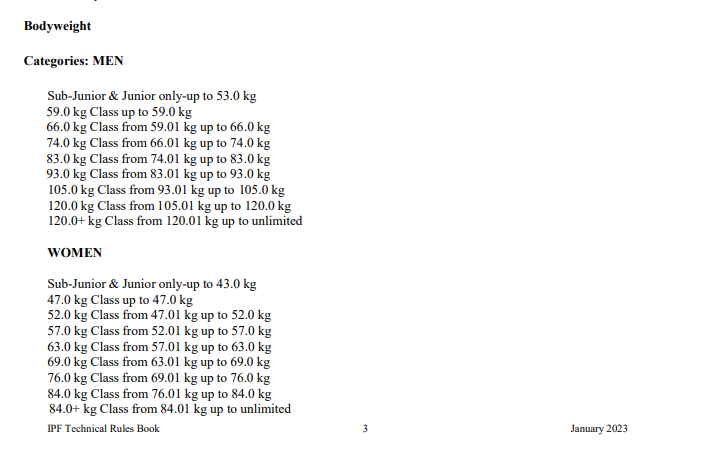

In [59]:
# Finding the shape of IPF weight classes
ipf_weight_classes = [
    '53','59','66','74','83','93','105','120','120+',
    '47','52','57','63','69','76','84','84+'
]

df2[df2['WeightClassKg'].isin(ipf_weight_classes)].shape


(220209, 23)

#### USAPL stands for USA Powerlifting, which is the United States affiliate to the International Powerlifting Federation (IPF). It's the national governing body for the sport of powerlifting in the United States. Eventhough USAPL is an affliate to IPF, most (if not all) of their hosted competitions doesn't follow the IPF's weight classses as they have autonomy in setting their own competition rules.

#### These are the weight class structure provided in their own USAPL rulebook:

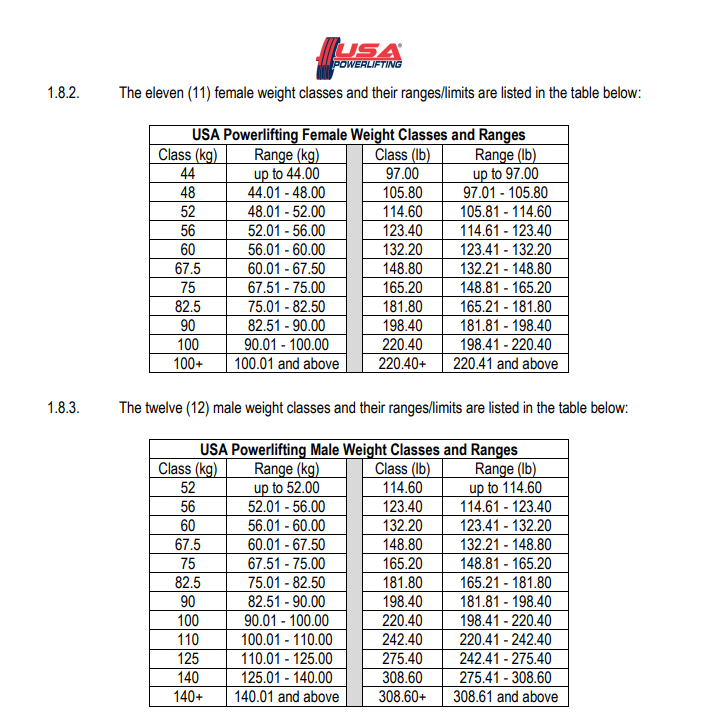

In [60]:
# Finding the shape of USAPL weight classes
usapl_weight_classes = [
    '52', '56', '60', '67.5', '75', '82.5', '90', '100', '110', '125', '140', '140+',
    '44', '48', '52', '56', '60', '67.5', '82.5', '90', '100', '100+'
]

df2[df2['WeightClassKg'].isin(usapl_weight_classes)].shape

(7064, 23)

In [61]:
# Finding the remaining weight classes outliers
remaining_weight_classes = set(df2['WeightClassKg']) - set(ipf_weight_classes) - set(usapl_weight_classes)
print(remaining_weight_classes)
df2[~df2['WeightClassKg'].isin(ipf_weight_classes) & ~df2['WeightClassKg'].isin(usapl_weight_classes) & ~df2['WeightClassKg'].isnull()]

{'83+', '90+', '52+', '69+', '+', '72', '76+', '39', '63+', '43', '57+', nan, '72+', '74+', '93+', '125+', '35', '40', '105+'}


Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState            MeetTown                                           MeetName
41                        Brittney Woznicki   F   SBD       Raw      Junior         68.10            72         105.0          67.5            122.5    295.0      1  303.01     USA    OH      USAPL              IPF 2018-08-04  2018         USA        OH                 NaN                    Dog Days of Summer Powerlifting
46                             Kenda Conley   F   SBD       Raw       Opens         67.13            72          99.8          63.5            129.3    292.6      2  303.04     USA    AK      USAPL              IPF 2018-12-08  2018         USA        AK                 NaN                  18th Annual Ketchikan Winter Meet
64                           Gale Lindemann   F   SBD       Raw    Master 2         64.18            72          52.2          34.0             65.8    152.0      7  161.65     USA    AK      USAPL              IPF 2018-12-08  2018         USA        AK                 NaN                  18th Annual Ketchikan Winter Meet
68                             Vanessa Head   F   SBD       Raw    Master 1         70.76            72          95.3          61.2            115.7    272.2      3  273.61     USA    AK      USAPL              IPF 2018-12-08  2018         USA        AK                 NaN                  18th Annual Ketchikan Winter Meet
87                         Viktoriya Panova   F   SBD       Raw  Sub-Junior         39.60            43          50.0          30.0             75.0    155.0      4  230.14     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL                Tula  Russian Sports Schools Classic Powerlifting Ch...
...                                     ...  ..   ...       ...         ...           ...           ...           ...           ...              ...      ...    ...     ...     ...   ...        ...              ...        ...   ...         ...       ...                 ...                                                ...
227740                       Elena Galbucci   F   SBD       Raw      Junior         42.75            43          77.5           0.0            105.0      0.0  DQ/NS    0.00     NaN   NaN       FIPL              IPF 2023-11-17  2023       Italy       NaN  S.Zenone al Lambro  3 gara nazionale trofeo next generation classi...
228582  Praveena Thurairajasingam-Mukunthan   F   SBD       Raw      Junior         42.00            43          97.5          45.0            122.5    265.0      1  378.44     NaN   NaN        APU              IPF 2023-12-02  2023   Australia        WA                 NaN        WA State Classic Powerlifting Championships
230421                         Gwen Marsden   F   SBD       Raw      Junior         42.60            43         112.5          75.0            142.5    330.0      1  466.05      UK   NaN        EPA              IPF 2024-02-03  2024     England       NaN           Cambridge           Cambridge vs Oxford Powerlifting Varsity
230931                   Christine Mechaley   F   SBD       Raw  Sub-Junior         42.80            43          45.0          25.0              0.0      0.0  DQ/NS    0.00     USA    NE        AMP              IPF 2024-01-20  2024         USA        NE             Lincoln                                 Capital City Clash
232895                       Mayleen Holder   F   SBD       Raw  Sub-Junior         42.25            43          85.0          47.5            100.0    232.5      1  330.49     NaN   NaN    FFForce              IPF 2024-01-27  2024      France       NaN              Woippy        Championnat Régional Femmes FA/PL Grand Est

[10629 rows x 23 columns]

#### It appears that a significant portion of the outliers consists of data from youth weight categories and various affiliates worldwide. Therefore, it is essential to exclude these numbers as the focus of this analysis is to adhere to the standardized rules of the International Powerlifting Federation (IPF). This also includes removing data from USAPL competitions too.

In [62]:
# Checking null values
df2[df2['WeightClassKg'].isna()]

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots  Country State Federation ParentFederation       Date  Year  MeetCountry MeetState      MeetTown                                       MeetName
10424     Viktor Vasilyev   M   SBD       Raw    Master 3        110.00           NaN         170.0         155.0            170.0    495.0      1  293.17   Russia   NaN        FPR              IPF 2018-02-24  2018       Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10425       Sergey Lobych   M   SBD       Raw    Master 1         81.35           NaN         155.0         120.0            195.0    470.0      3  320.94   Russia   NaN        FPR              IPF 2018-02-24  2018       Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10426   Sergey Raschupkin   M   SBD       Raw    Master 1         96.85           NaN         200.0         135.0            215.0    550.0      2  343.37   Russia   NaN        FPR              IPF 2018-02-24  2018       Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
10427      Aleksey Petrov   M   SBD       Raw    Master 1        111.00           NaN         205.0         165.0            232.5    602.5      1  355.64   Russia   NaN        FPR              IPF 2018-02-24  2018       Russia       KGD   Kaliningrad  Kaliningrad Oblast Powerlifting Championships
13404     Małgorzata Otto   F   SBD       Raw    Master 1         57.80           NaN         110.0          60.0            125.0    295.0      1  334.93   Poland   NaN    PZKFiTS              IPF 2018-03-17  2018       Poland       NaN  Skierniewice                Polish Classic Powerlifting Cup
...                   ...  ..   ...       ...         ...           ...           ...           ...           ...              ...      ...    ...     ...      ...   ...        ...              ...        ...   ...          ...       ...           ...                                            ...
232196     Jassim Messina   M   SBD       Raw      Junior         82.40           NaN         190.0         105.0            240.0    535.0      4  362.65      NaN   NaN       KDKS              IPF 2024-02-03  2024  Switzerland       NaN         Olten                   Vereinswettkampf Maschinerie
232197    Fridolin Hauser   M   SBD       Raw       Opens         89.00           NaN         185.0         117.5            207.5    510.0      5  331.64      NaN   NaN       KDKS              IPF 2024-02-03  2024  Switzerland       NaN         Olten                   Vereinswettkampf Maschinerie
232214         Stefan Bur   M   SBD       Raw    Master 2         73.70           NaN         135.0          95.0            140.0    370.0     10  268.46      NaN   NaN       KDKS              IPF 2024-02-03  2024  Switzerland       NaN         Olten                   Vereinswettkampf Maschinerie
232601       Josh Dungate   M   SBD       Raw      Junior           NaN           NaN           0.0           0.0              0.0      0.0  DQ/NS    0.00  England    SW        EPA              IPF 2024-02-17  2024      England        SW    Gloucester             Glos Power Development Competition
232791      Simon Parsons   M   SBD       Raw       Opens           NaN           NaN           0.0           0.0              0.0      0.0  DQ/NS    0.00  England   NaN        EPA              IPF 2024-02-04  2024      England       NaN        London                  Greater London BUCS Qualifier

[1710 rows x 23 columns]

#### Given the nature of the dataset, it would be impossible to manipluate null values, even with the data of the lifter's bodyweight. There are too many variables such as varying weight classes from affliates around the world, and even justifying if a meet is following IPF's/USAPL 's weight category ruling is an impossible task. Therefore, I will exclude null values from the dataset.

In [63]:
df2.shape

(232952, 23)

In [64]:
df2[df2['WeightClassKg'].isin(ipf_weight_classes)].shape

(220209, 23)

#### It would appear that only 10000~ are filtered after the justifications made. I will also need to remove any null values from the BodyweightKg column as I don't want any unknown values in the dataset

In [65]:
df2[df2['BodyweightKg'].isnull()].shape

(467, 23)

In [66]:
# Assigning back to df2
df2 = df2[df2['BodyweightKg'].notnull()]
df2 = df2[df2['WeightClassKg'].isin(ipf_weight_classes)]

df2 = df2.reset_index(drop=True)

#### Check for any outliers for Male/Female

In [67]:
df2['Sex'].unique()

array(['F', 'M', 'Mx'], dtype=object)

In [68]:
df2[df2['Sex'] == 'Mx']

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown                MeetName
110934  Elaine Bradley  Mx   SBD       Raw       Opens          88.0           84+         112.5          57.5            130.0    300.0     1  196.22     USA    GA      USAPL              IPF 2020-11-07  2020         USA        GA      NaN  Viking Strength Sports

In [69]:
df2 = df2[df2['Sex'] != 'Mx']

#### Let's check if there are outliers, where the Male and Female competitors might have different values than in the IPF rule book

In [70]:
male_ipf_weight_classes = [
    '53','59','66','74','83','93','105','120','120+',
]

# Create a boolean mask for 'Sex' is 'M'
male_mask = df2['Sex'] == 'M'

# Check outliers 
df2[male_mask & ~df2['WeightClassKg'].isin(male_ipf_weight_classes)]

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown                  MeetName
26759        Justice Dilley   M   SBD       Raw  Sub-Junior          51.5            52           0.0          70.0            125.0      0.0  DQ/NS    0.00     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26760  Dylan Daly-Schreiner   M   SBD       Raw  Sub-Junior          50.9            52          62.5          42.5            107.5    212.5      8  207.74     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26761       Carson Junemann   M   SBD       Raw  Sub-Junior          51.4            52          77.5          40.0            110.0    227.5      7  220.32     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26762         Dawson Jenkin   M   SBD       Raw  Sub-Junior          49.9            52          85.0          45.0            102.5    232.5      6  231.74     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26763       Jacob Matoushek   M   SBD       Raw  Sub-Junior          49.3            52          80.0          50.0            105.0    235.0      5  237.06     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26764    Christian Shigouri   M   SBD       Raw  Sub-Junior          51.2            52          80.0          55.0            130.0    265.0      4  257.60     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26765              Lane Lee   M   SBD       Raw  Sub-Junior          52.0            52          95.0          55.0            125.0    275.0      3  263.39     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26766       Forest Thoreson   M   SBD       Raw  Sub-Junior          51.8            52          95.0          67.5            137.5    300.0      2  288.39     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26767           Brian Bauch   M   SBD       Raw  Sub-Junior          50.7            52         115.0          67.5            137.5    320.0      1  314.03     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship
26768          Alan Jimenez   M   SBD       Raw  Sub-Junior          51.1            52          75.0          40.0             87.5    202.5      9  197.22     USA    WI      USAPL              IPF 2018-03-11  2018         USA        WI      NaN  WHSPA State Championship

In [71]:
female_ipf_weight_classes = [
    '47','52','57','63','69','76','84','84+'
]
# Create a boolean mask where 'Sex' is 'F'
female_mask = df2['Sex'] == 'F'

# Check outliers 
df2[female_mask & ~df2['WeightClassKg'].isin(female_ipf_weight_classes)]


Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState      MeetTown                       MeetName
117994  Oksana Rimkienė   F   SBD       Raw    Master 1         55.75            59          85.0          40.0            105.0    230.0     1  267.39     NaN   NaN       LJTF              IPF 2021-05-29  2021   Lithuania       NaN  Pravieniškės  Classic National Championship

In [72]:
# Create a combine mask to remove these outliers
combined_mask = ((df2['Sex'] == 'M') & (~df2['WeightClassKg'].isin(male_ipf_weight_classes))) | \
                ((df2['Sex'] == 'F') & (~df2['WeightClassKg'].isin(female_ipf_weight_classes)))

df2 = df2[~combined_mask]

In [73]:
df2.shape

(220141, 23)

In [74]:
df2.head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63          90.0          40.0            142.5    272.5      1  293.08  Canada    ON        CPU              IPF 2018-06-09  2018      Canada        ON  Niagara        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83         132.5         100.0            205.0    437.5      1  299.28     USA    AK      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+         190.0           0.0              0.0      0.0  DQ/NS    0.00     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+         165.0         127.5            252.5    545.0      2  308.49     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+         272.5         170.0            285.0    727.5      1  410.47     USA    NE      USAPL              IPF 2018-02-24  2018         USA        NE      NaN  Capital City Clash

 <hr>

### 7. Clean rest of the columns

In [75]:
# Check the remaining null values
df2.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
AgeDivision              0
BodyweightKg             0
WeightClassKg            0
Best3SquatKg             0
Best3BenchKg             0
Best3DeadliftKg          0
TotalKg                  0
Place                    0
Dots                     0
Country              68956
State               135907
Federation               0
ParentFederation         0
Date                     0
Year                     0
MeetCountry              0
MeetState           103666
MeetTown             71338
MeetName                 0
dtype: int64

In [76]:
# Checking dataset on null values in 'Country' column
df2[df2['Country'].isnull()].head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Country State Federation ParentFederation       Date  Year MeetCountry MeetState MeetTown                                           MeetName
69        Vera Gorelova   F   SBD       Raw  Sub-Junior         81.55            84         130.0          57.5            120.0    307.5      1  287.01     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...
70     Kamila Devletova   F   SBD       Raw  Sub-Junior         63.00            63           0.0           0.0              0.0      0.0  DQ/NS    0.00     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...
72  Ulyana Ovsyannikova   F   SBD       Raw  Sub-Junior         62.35            63          70.0          40.0             85.0    195.0      3  211.06     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...
73   Kseniya Panteleeva   F   SBD       Raw  Sub-Junior         60.65            63          90.0          47.5             90.0    227.5      1  250.49     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...
77     Karina Trofimova   F   SBD       Raw  Sub-Junior         51.35            52          45.0          27.5             60.0    132.5      4  162.93     NaN   NaN        FPR              IPF 2018-04-18  2018      Russia       TUL     Tula  Russian Sports Schools Classic Powerlifting Ch...

#### 'MeetCountry' seems to indicate the country the competition was held whereas 'Country' indicates where the lifter was born. It seems that the lifter's birth country contains null values. I will change those null values to 'Unknown' for future exploratory analysis. 

In [77]:
# Changing null values to Unknown
df2['Country'].fillna('Unknown', inplace=True)

#### I also don't need the State, MeetState and MeetTown columns.

In [78]:
df2 = df2.drop(['State','MeetState','MeetTown'], axis=1)

In [79]:
df2.head(5)

Name Sex Event Equipment AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg  Place    Dots Country Federation ParentFederation       Date  Year MeetCountry            MeetName
0       Taran Dhanju   F   SBD       Raw    Master 1          63.0            63          90.0          40.0            142.5    272.5      1  293.08  Canada        CPU              IPF 2018-06-09  2018      Canada        Niagara Open
1       Bryan Sledge   M   SBD       Raw      Junior          81.1            83         132.5         100.0            205.0    437.5      1  299.28     USA      USAPL              IPF 2018-02-24  2018         USA  Capital City Clash
2     Robert Stolley   M   SBD       Raw       Opens         212.0          120+         190.0           0.0              0.0      0.0  DQ/NS    0.00     USA      USAPL              IPF 2018-02-24  2018         USA  Capital City Clash
3  Patrick Mcconnell   M   SBD       Raw      Junior         125.5          120+         165.0         127.5            252.5    545.0      2  308.49     USA      USAPL              IPF 2018-02-24  2018         USA  Capital City Clash
4         Mike Kracl   M   SBD       Raw       Opens         126.8          120+         272.5         170.0            285.0    727.5      1  410.47     USA      USAPL              IPF 2018-02-24  2018         USA  Capital City Clash

In [80]:
df2.isna().sum()

Name                0
Sex                 0
Event               0
Equipment           0
AgeDivision         0
BodyweightKg        0
WeightClassKg       0
Best3SquatKg        0
Best3BenchKg        0
Best3DeadliftKg     0
TotalKg             0
Place               0
Dots                0
Country             0
Federation          0
ParentFederation    0
Date                0
Year                0
MeetCountry         0
MeetName            0
dtype: int64

In [81]:
# Dropping ParentFederation and Equipment as it is all IPF, and Raw lifters
df2 = df2.drop(['ParentFederation','Equipment'], axis=1)

#### Perfect! Finally I will look through any duplicated values in the dataset.

In [82]:
df2.shape

(220141, 18)

In [83]:
# Check all exact values of rows
df2[df2.duplicated(keep=False)]

Name Sex Event AgeDivision  BodyweightKg WeightClassKg  Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg Place    Dots Country Federation       Date  Year MeetCountry                                   MeetName
66            Hannah Mathie   F   SBD      Junior         56.80            57         142.5          65.0            142.5    350.0     1  401.92     USA      USAPL 2018-08-04  2018         USA            Dog Days of Summer Powerlifting
68            Hannah Mathie   F   SBD      Junior         56.80            57         142.5          65.0            142.5    350.0     1  401.92     USA      USAPL 2018-08-04  2018         USA            Dog Days of Summer Powerlifting
141           Russel Nguyen   M   SBD      Junior         76.70            83         205.0         135.0            240.0    580.0     1  410.27     USA      USAPL 2018-05-19  2018         USA                Long Island Spring Showdown
144                 Amy Zhu   F   SBD      Junior         56.50            57         112.5          60.0            117.5    290.0     1  334.18     USA      USAPL 2018-05-19  2018         USA                Long Island Spring Showdown
145                 Amy Zhu   F   SBD      Junior         56.50            57         112.5          60.0            117.5    290.0     1  334.18     USA      USAPL 2018-05-19  2018         USA                Long Island Spring Showdown
...                     ...  ..   ...         ...           ...           ...           ...           ...              ...      ...   ...     ...     ...        ...        ...   ...         ...                                        ...
219743  Jessica Marshall #1   F   SBD    Master 3         63.40            69         117.5          60.0            152.5    330.0     1  353.56     USA        AMP 2024-02-03  2024         USA                          DMV Championships
219766     Michelle Harrell   F   SBD    Master 1        104.90           84+         150.0          95.0            175.0    420.0     1  352.01     USA        AMP 2024-02-17  2024         USA                      Lake Pleasant Classic
219771     Michelle Harrell   F   SBD    Master 1        104.90           84+         150.0          95.0            175.0    420.0     1  352.01     USA        AMP 2024-02-17  2024         USA                      Lake Pleasant Classic
219778           Cherie Tan   F   SBD    Master 1         67.97            69          80.0          35.0             87.5    202.5     1  208.23     USA        AMP 2024-01-20  2024         USA  7th Annual Jacksonville Open Championship
220041           Cherie Tan   F   SBD    Master 1         67.97            69          80.0          35.0             87.5    202.5     1  208.23     USA        AMP 2024-01-20  2024         USA  7th Annual Jacksonville Open Championship

[6797 rows x 18 columns]

In [84]:
# Drop duplicated values
df2 = df2.drop_duplicates(keep='first')

In [85]:
df2[df2.duplicated(keep=False)]

Empty DataFrame
Columns: [Name, Sex, Event, AgeDivision, BodyweightKg, WeightClassKg, Best3SquatKg, Best3BenchKg, Best3DeadliftKg, TotalKg, Place, Dots, Country, Federation, Date, Year, MeetCountry, MeetName]
Index: []

In [86]:
# Renaming of columns
df3 = df2.rename(columns = {
    'Name': 'name',
    'Sex': 'sex',
    'Event': 'event',
    'AgeDivision': 'age_division',
    'BodyweightKg': 'bodyweight',
    'WeightClassKg': 'weight_class',
    'Best3SquatKg': 'best_squat',
    'Best3BenchKg': 'best_bench',
    'Best3DeadliftKg': 'best_deadlift',
    'TotalKg': 'total',
    'Place': 'place',
    'Dots': 'dots_score',
    'Country': 'birth_country',
    'Federation': 'federation',
    'Date': 'meet_date',
    'Year': 'meet_year',
    'MeetCountry': 'meet_country',
    'MeetName': 'meet_name'
                })

# Remove hhmmss from date
df3['meet_date'] = df3['meet_date'].dt.date

# Sort values with meet_date
df3 = df3.sort_values(by='meet_date')
df3 = df3.reset_index(drop=True)

In [87]:
df3.head(10)

name sex event age_division  bodyweight weight_class  best_squat  best_bench  best_deadlift  total place  dots_score birth_country federation   meet_date  meet_year meet_country       meet_name
0                     Daniel Gonzalez   M   SBD        Opens        93.7          105       185.0       115.0          220.0  520.0     3      329.67       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
1               Miguel Franco Gallado   M   SBD        Opens        77.1           83       155.0       105.0          200.0  460.0     5      324.34       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
2  Sebastian Camilo Troncozo Gonzalez   M   SBD        Opens        78.6           83       167.5       100.0          192.5  460.0     6      320.55       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
3        Nicolás Andrés Rojas Grandón   M   SBD        Opens        81.0           83       170.0       112.5          185.0  467.5     4      320.03       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
4    Francisco Andrés Peña Hermosilla   M   SBD        Opens        87.3           93       170.0       105.0          200.0  475.0     5      311.98       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
5   Astrid Carolina Kroff Rosentreter   F   SBD        Opens        60.0           63        80.0        45.0          120.0  245.0     2      271.59       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
6       Javier Ignacio Ventura Lovera   M   SBD       Junior        70.7           74       132.5       100.0          165.0  397.5     4      296.54       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
7        Francisco Villarroel Machuca   M   SBD       Junior        72.7           74       162.5       105.0          192.5  460.0     2      336.77       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
8                         Paolo Araya   M   SBD        Opens        90.9           93       200.0       125.0          220.0  545.0     2      350.65       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile
9                Anyelo Riquelme Urra   M   SBD       Junior        69.7           74       170.0       130.0          220.0  520.0     1      391.77       Unknown    FECHIPO  2018-01-01       2018        Chile  Nacional Chile

#### Finally, this dataset is cleaned and ready to be used for EDA

<hr> 

# Exploratory Data Analysis

#### Let's check out the most popular weight classes!

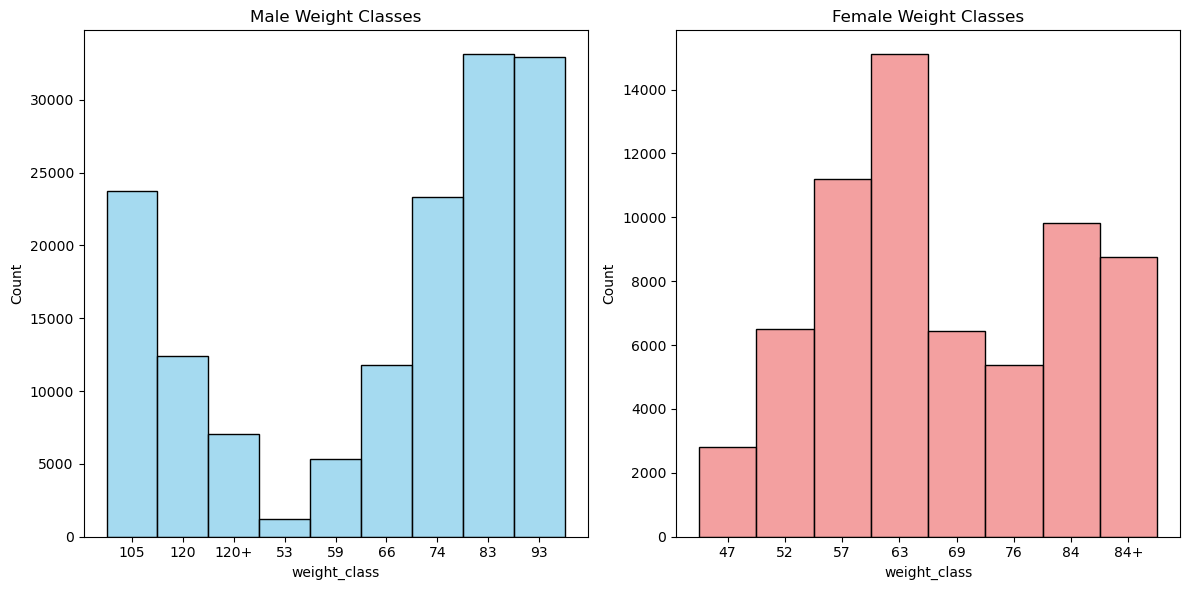

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sort_df = df3.sort_values(by='weight_class', ascending=True)

sns.histplot(data=sort_df[sort_df['sex'] == 'M'], x='weight_class', ax=axes[0], color='skyblue')
axes[0].set_title('Male Weight Classes')

sns.histplot(data=sort_df[sort_df['sex'] == 'F'], x='weight_class', ax=axes[1], color='lightcoral')
axes[1].set_title('Female Weight Classes')

plt.tight_layout()
plt.show()

#### It would appear that the most popular male weight classes are U83, and U93. While U63 is the most popular for females. I wonder what is the distribution between male and female lifters are!

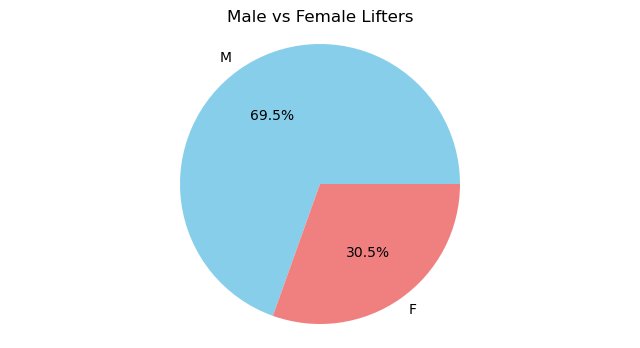

In [89]:
gender_counts = df3['sex'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Male vs Female Lifters')
plt.axis('equal')  # Equal aspect ratio so that pie is drawn as a circle
plt.show()

#### As expected, there are significantly higher male lifters than their counterpart! That being said, I wonder who is the strongest male and female. I will use DOTS score to determine this question, as it is a ratio between a lifter's body weight and the weight they're lifting. 

In [90]:
df3.iloc[df3[df3['sex'] == 'M']['dots_score'].idxmax()]

name             Taylor Atwood
sex                          M
event                      SBD
age_division             Opens
bodyweight               73.63
weight_class                74
best_squat               303.0
best_bench               195.0
best_deadlift            340.5
total                    838.5
place                        1
dots_score              608.77
birth_country              USA
federation               USAPL
meet_date           2021-06-14
meet_year                 2021
meet_country               USA
meet_name        Raw Nationals
Name: 124790, dtype: object

In [91]:
df3.iloc[df3[df3['sex'] == 'F']['dots_score'].idxmax()]

name                  Prescillia Bavoil
sex                                   F
event                               SBD
age_division                      Opens
bodyweight                         62.6
weight_class                         63
best_squat                        213.0
best_bench                        112.5
best_deadlift                     231.0
total                             556.5
place                                 1
dots_score                       600.86
birth_country                    France
federation                          IPF
meet_date                    2022-09-23
meet_year                          2022
meet_country                    England
meet_name        Arnold Sports Festival
Name: 164043, dtype: object

#### Taylor Atwood and Lya (Prescillia Bavoil) are widely recognized figures in the powerlifting community, boasting over a decade of experience each in this demanding sport. It wasn't surprising to see their names appearing! Now I'm inclinced to know who lifted the most weight in a competition.

In [92]:
df3.iloc[df3[df3['sex'] == 'M']['total'].idxmax()]

name                     Ray Williams #1
sex                                    M
event                                SBD
age_division                       Opens
bodyweight                         190.4
weight_class                        120+
best_squat                         490.0
best_bench                         247.5
best_deadlift                      375.0
total                             1112.5
place                                  1
dots_score                        562.77
birth_country                        USA
federation                         USAPL
meet_date                     2019-03-02
meet_year                           2019
meet_country                         USA
meet_name        Arnold SBD Pro American
Name: 50656, dtype: object

#### RAY WILLIAMS LIFTED 1112.5 KGS???? Looking through wikipedia:
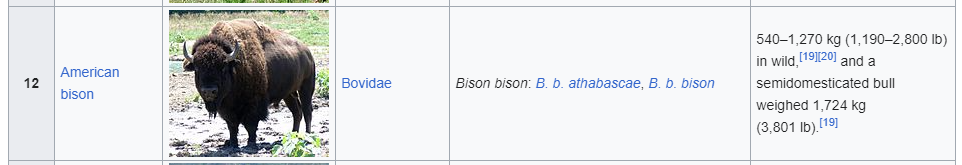
#### Ray Williams doesn't just lift weights, he lifts American Bisons! If that's not superhuman, I don't know what is.. 
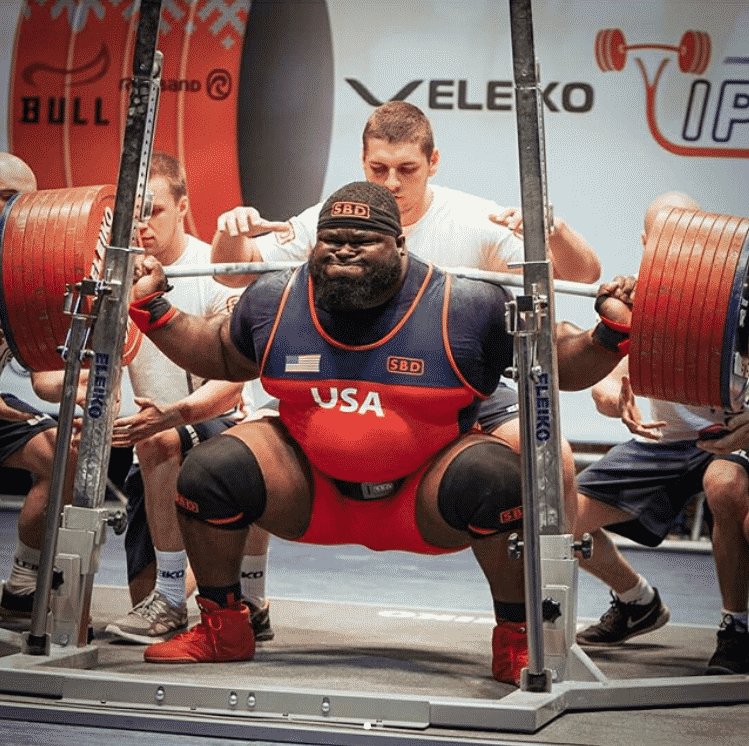

<hr> 

#### Now back to your average lifter (notice the huge difference in size 🤣): In 2022, I competed as a U59 lifter, indicating that my weight class was under 59kg. During these competitions, my bodyweight hovered around the 58-59kg mark, aligning closely with the requirements of the ipf weight class. Though not as strong as Ray Williams, I did managed to achieve decent results in both meets!

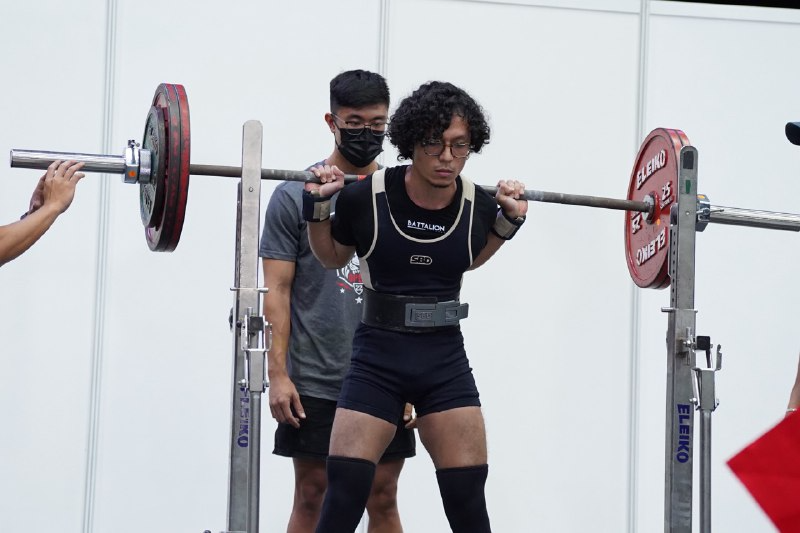

#### Let's take a look at my numbers!

In [93]:
df3.loc[df3['name'] == 'Muhammad Ghazi Bin Hishamuddin', 'name']

160540    Muhammad Ghazi Bin Hishamuddin
172553    Muhammad Ghazi Bin Hishamuddin
Name: name, dtype: object

In [94]:
# 160552
df3.iloc[160540]

name             Muhammad Ghazi Bin Hishamuddin
sex                                           M
event                                       SBD
age_division                              Opens
bodyweight                                58.25
weight_class                                 59
best_squat                                150.0
best_bench                                105.0
best_deadlift                             187.5
total                                     442.5
place                                         2
dots_score                               382.82
birth_country                           Unknown
federation                                   PS
meet_date                            2022-08-19
meet_year                                  2022
meet_country                          Singapore
meet_name           Singapore Powerlifting Open
Name: 160540, dtype: object

In [95]:
# 172565
df3.iloc[172553]

name             Muhammad Ghazi Bin Hishamuddin
sex                                           M
event                                       SBD
age_division                              Opens
bodyweight                                58.85
weight_class                                 59
best_squat                                152.5
best_bench                                115.0
best_deadlift                             182.5
total                                     450.0
place                                         3
dots_score                               385.96
birth_country                           Unknown
federation                                   PS
meet_date                            2022-12-10
meet_year                                  2022
meet_country                          Singapore
meet_name                 Ark Powerlifting Open
Name: 172553, dtype: object

#### It's important to acknowledge that maintaining a weight of 59kg at my height (167cm) may not have been optimal 😭 There is potential for further muscle development and optimization of my physique, which could have positively impacted my performance. But I'm curious to see where I stand among my U59 lifters!

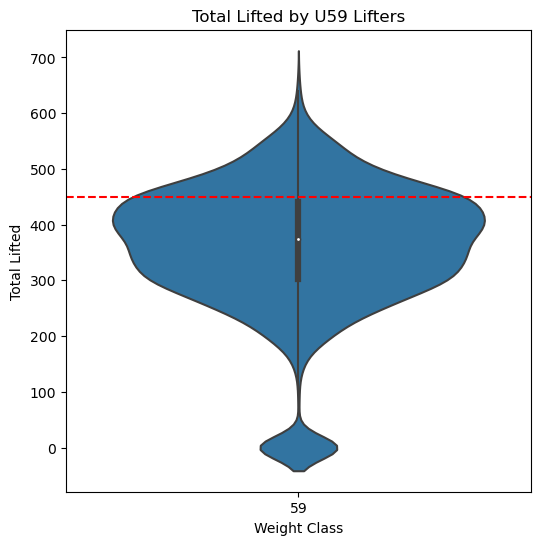

In [96]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='weight_class', y='total', data=df3[df3['weight_class'] == '59'])
plt.axhline(y=450, color='red', linestyle='--', label='My Highest Total')
plt.title('Total Lifted by U59 Lifters')
plt.xlabel('Weight Class')
plt.ylabel('Total Lifted')
plt.show()

#### I sit right above the third quartile, though it would seem the the most frequent value is around the 380-420kg total range. Let's take a look whether this holds true for DOTS value!

###### dots_score     385.96

In [97]:
# Calculate mean DOTS for juniors
junior_u59 = df3[(df3['age_division'] == 'Junior') & (df3['weight_class'] == '59') & (df3['dots_score'] != 0)]['dots_score'].mean()

# Calculate mean DOTS for opens
opens_u59 = df3[(df3['age_division'] == 'Opens') & (df3['weight_class'] == '59') & (df3['dots_score'] != 0)]['dots_score'].mean()

print("Mean DOTS for Junior:", junior_u59)
print("Mean DOTS for Opens:", opens_u59)

Mean DOTS for Junior: 358.9766091954022
Mean DOTS for Opens: 378.35168356997974


#### That's heartwarming to see that I'm slightly above average! (quite apparent with the others things I have in my life too 🤣😪)

<hr> 

#### Let's look through a scatter plot illustrating the relationship between total weight lifted and bodyweight, with points colored according to gender and a regression line overlay to discern the overall trend.

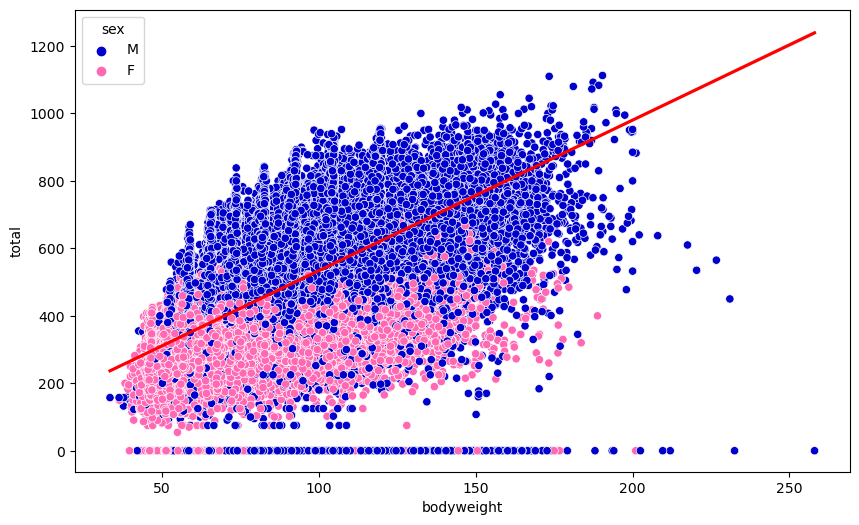

R-squared value: 0.2887657518367255


In [98]:
gender_palette = {'M': 'mediumblue', 'F': 'hotpink'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='bodyweight', y='total', hue='sex', palette=gender_palette)
sns.regplot(x='bodyweight', y='total', data=df3, scatter=False, line_kws={'color': 'red'})

plt.show()


# R-squared calclulation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = np.array(df3['bodyweight'])  
y = np.array(df3['total'])      

# Model total regression
total_model = LinearRegression().fit(x.reshape(-1, 1), y)
total_r = r2_score(y, total_model.predict(x.reshape(-1, 1)))

print("R-squared value:", total_r)

#### The scatter plot shows a clear separation between male and female lifters based on their total scores and bodyweights, with male lifters generally achieving higher totals and having higher bodyweights. The line of points along the x-axis at total = 0 would likely represents lifters who were disqualified or did not complete any successful lifts.

#### For both male and female lifters, there is a positive linear correlation between bodyweight and total score. As bodyweight increases, the total score tends to increase as well, which aligns with the expectation that heavier lifters generally have the potential to lift more total weight! However, the spread of points increases with higher bodyweights, indicating greater variation in total scores among higher weight classes compared to lower weight classes.

#### While the overall trend is linear and positive, there is still substantial variation within each bodyweight range. The R-squared value of approximately 0.29 indicates that around 29% of the variability in total scores can be explained by bodyweight alone. This implies that a considerable portion of the variation in total scores is attributed to factors other than bodyweight, highlighting the complexity of performance in powerlifting competitions.

#### Let's take a look at where I stand in this scatter plot!

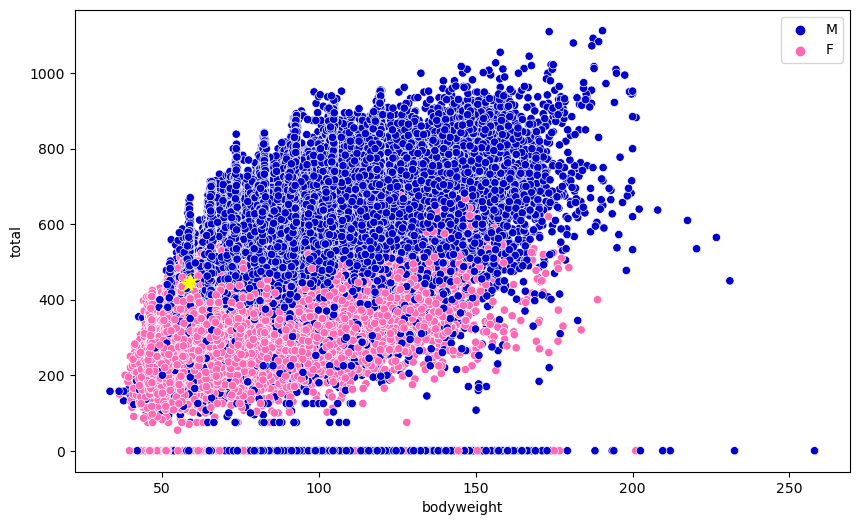

In [99]:
my_records = df3[df3['name'] == "Muhammad Ghazi Bin Hishamuddin"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='bodyweight', y='total', hue='sex',  palette=gender_palette)

for idx, row in my_records.iterrows():
    plt.scatter(row['bodyweight'], row['total'], color='yellow', marker='*', s=100, label='Your Record' if idx == 0 else None)

plt.legend()
plt.show()

#### As discussed earlier;  in comparison with the other male lifters around the same bodyweight, it would seem that I'm on the higher end of the distribution. Those 3 years of hard work did not put to waste!! However, there is still room for improvement as there are better performing lifters in my weightclass. 💪

 <hr>

#### Let's take a look at top level lifters in Singapore. One of them our very own Singapore Powerlifting (SGPL) president, Clinton Lee. Clinton competes in the 74 kg weight class and he has represented Singapore numerous times in his liftetime as a powerlifter.

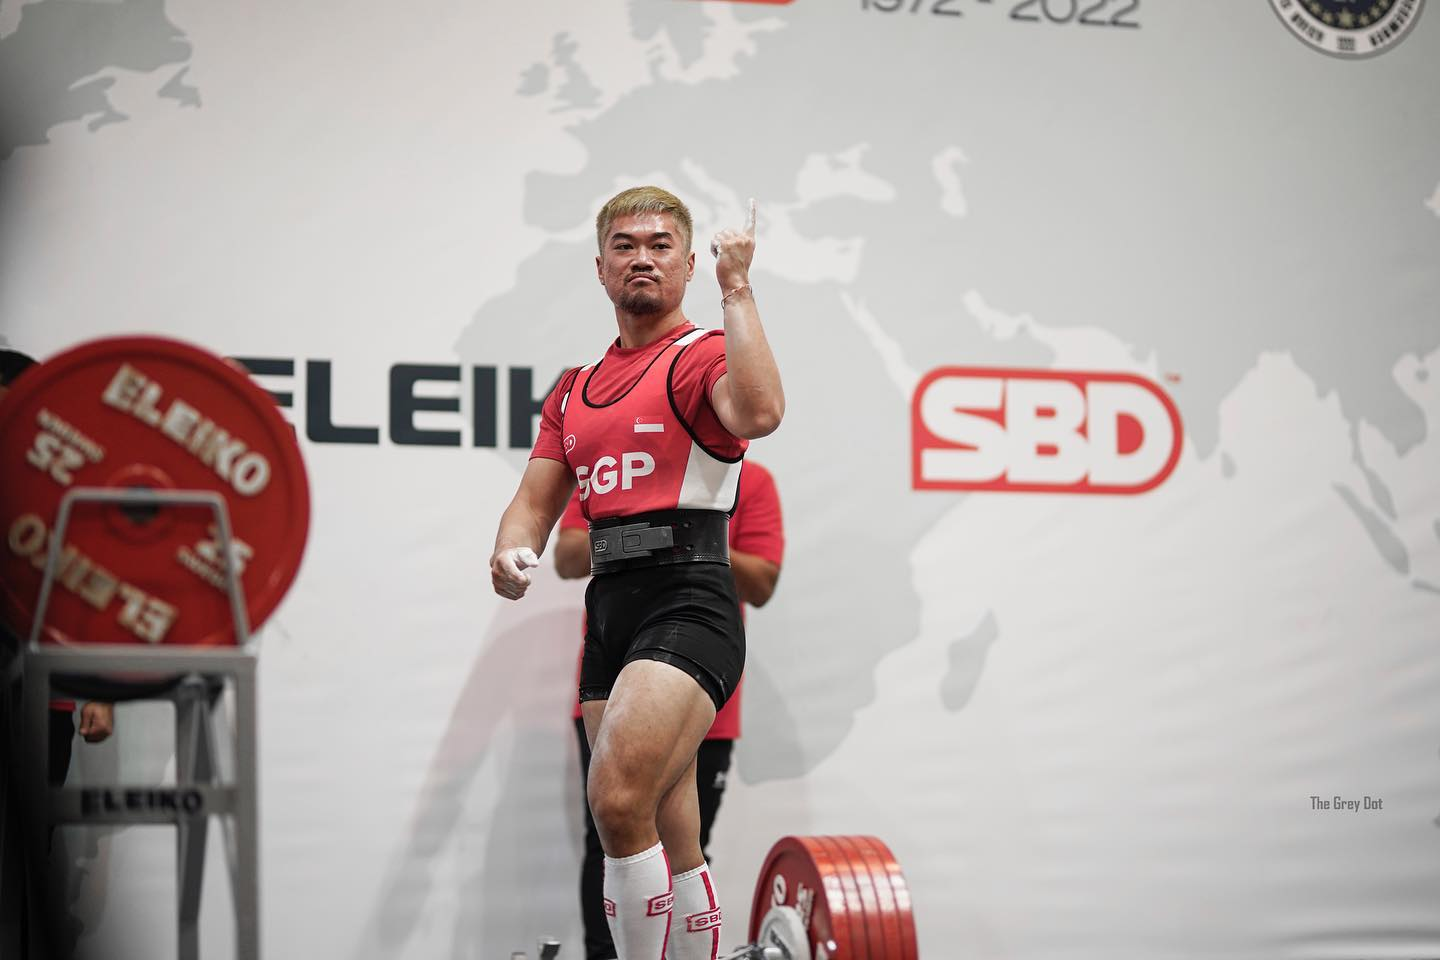
##### Credits: https://www.instagram.com/clintoncratus/

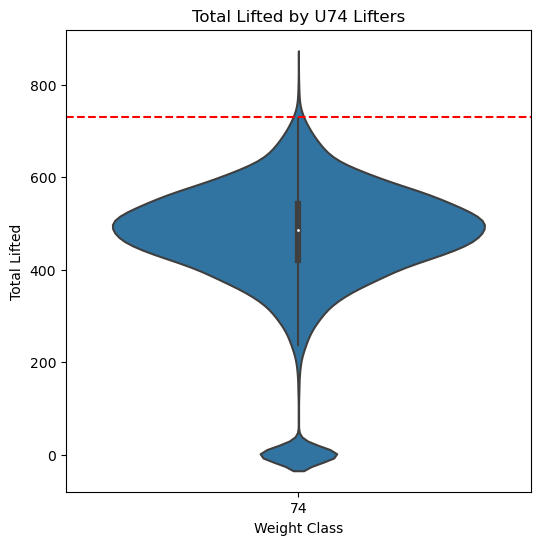

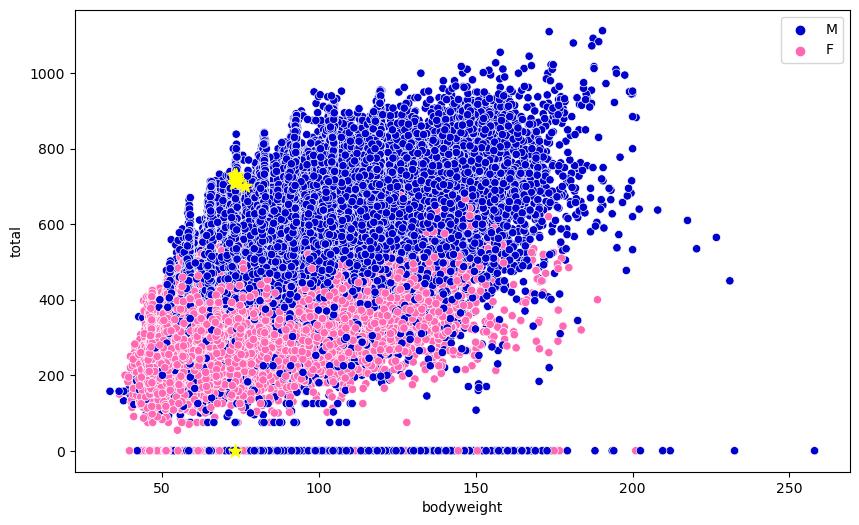

In [100]:
clinton_lee = df3[df3['name'] == 'Clinton Lee #1']
clinton_lee_totals = df3[df3['name'] == 'Clinton Lee #1']['total']

#Violin Plot
plt.figure(figsize=(6, 6))
sns.violinplot(x='weight_class', y='total', data=df3[df3['weight_class'] == '74'])
plt.axhline(y=clinton_lee_totals.max(), color='red', linestyle='--', label='Clinton Highest Total')
plt.title('Total Lifted by U74 Lifters')
plt.xlabel('Weight Class')
plt.ylabel('Total Lifted')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='bodyweight', y='total', hue='sex',  palette=gender_palette)

for idx, row in clinton_lee.iterrows():
    plt.scatter(row['bodyweight'], row['total'], color='yellow', marker='*', s=100, label='Clinton Lee Record' if idx == 0 else None)

plt.legend()
plt.show()

#### Clinton falls near the upper end of the dense area of the distribution, representing a relatively high percentile of the total weight lifted within the U74 weight class. He is an elite level lifter with years of experience under his belt, though that doesn't make him less human. From the scatter plot, it would appear that he failed to qualify a total in one of the meets. Let's take a look at what meet that might be:

In [101]:
df3.loc[(df3['name'] == 'Clinton Lee #1') & (df3['total'] == 0)]

name sex event age_division  bodyweight weight_class  best_squat  best_bench  best_deadlift  total  place  dots_score birth_country federation   meet_date  meet_year meet_country                                 meet_name
212510  Clinton Lee #1   M   SBD        Opens        73.4           74       262.5       170.0            0.0    0.0  DQ/NS         0.0     Singapore    AsianPF  2023-12-11       2023     Malaysia  Asian Classic Powerlifting Championships

#### It would appear that he did indeed missed all 3 attempts of his deadlift at the Asian Classic Powerlifting Championships hosted in Malaysia. 

#### Thank you for representing Singapore for us Clinton! We wish him the best of luck for the upcoming World Open Classic Powerlifting Championships 2024, set to take place from 15-23 June 2024 in Druskininkai, Lithuania!

#### I'm intrigued to know the correlation between all the numeric columns. This could be an indiciation of what contributes most in a lifter's total score

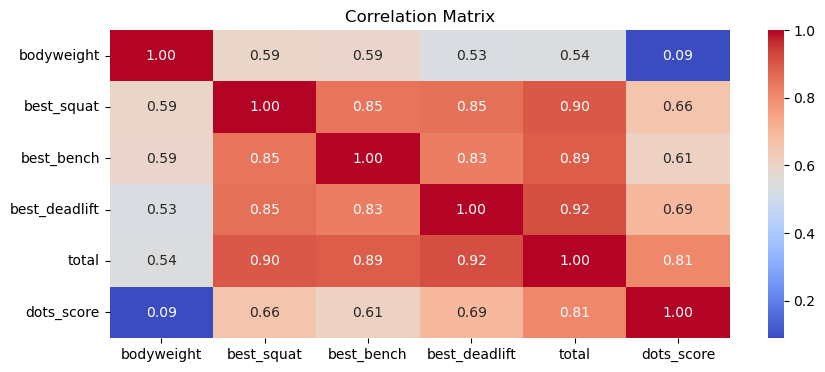

In [102]:
numeric_columns = ['bodyweight', 'best_squat', 'best_bench', 'best_deadlift', 'total', 'dots_score']
correlation_matrix = df3[numeric_columns].corr()

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


#### It would seem that deadlift has a very strong correlation (0.92) with total, while bench has a smaller correlation (0.89).Both the squat and deadlift appear to be strong contributors to the total score, with the bench being slightly less influential but still positively correlated.

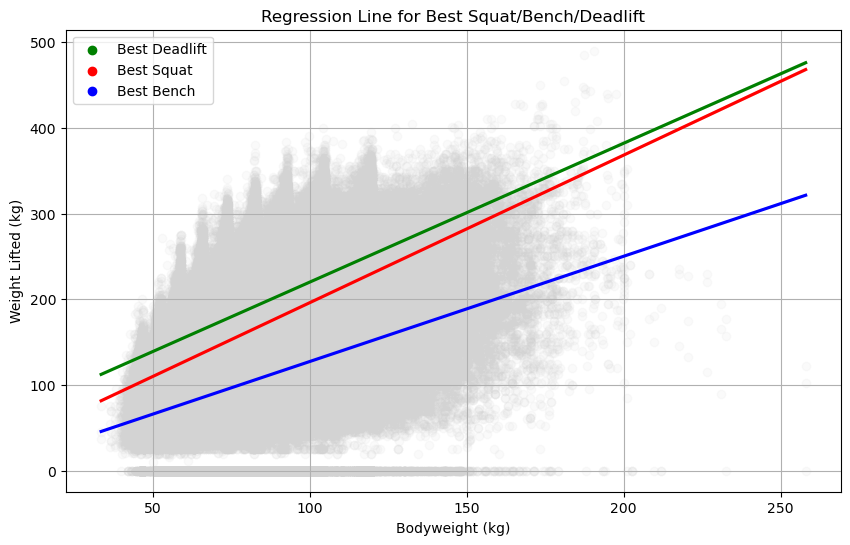

Squat R-squared value: 0.35087975513910763
Bench R-squared value: 0.3451292200969316
Deadlift R-squared value: 0.28280928588889953


In [103]:
plt.figure(figsize=(10, 6))

# Plotting scatter plots with regression lines for each lift
sns.regplot(x='bodyweight', y='best_squat', data=df3, scatter_kws={'alpha': 0.1, 'color': 'lightgrey'}, line_kws={'color': 'red'})
sns.regplot(x='bodyweight', y='best_bench', data=df3, scatter_kws={'alpha': 0.1, 'color': 'lightgrey'}, line_kws={'color': 'blue'})
sns.regplot(x='bodyweight', y='best_deadlift', data=df3, scatter_kws={'alpha': 0.1, 'color': 'lightgrey'}, line_kws={'color': 'green'}
           )
# Dummy scatter plots for legend
plt.scatter([], [], color='green', label='Best Deadlift')
plt.scatter([], [], color='red', label='Best Squat')
plt.scatter([], [], color='blue', label='Best Bench')
plt.legend(loc='upper left')

plt.title('Regression Line for Best Squat/Bench/Deadlift')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Weight Lifted (kg)')
plt.legend()
plt.grid(True)
plt.show()


### R-squared calculation
x = np.array(df3['bodyweight'])  
y1 = np.array(df3['best_squat'])      
y2 = np.array(df3['best_bench'])      
y3 = np.array(df3['best_deadlift']) 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Squat regression
squat_model = LinearRegression().fit(x.reshape(-1, 1), y1)
squat_r = r2_score(y1, squat_model.predict(x.reshape(-1, 1)))

# Bench regression
bench_model = LinearRegression().fit(x.reshape(-1, 1), y2)
bench_r = r2_score(y2, bench_model.predict(x.reshape(-1, 1)))

# Deadlift regression
deadlift_model = LinearRegression().fit(x.reshape(-1, 1), y3)
deadlift_r = r2_score(y3, deadlift_model.predict(x.reshape(-1, 1)))

print("Squat R-squared value:", squat_r)
print("Bench R-squared value:", bench_r)
print("Deadlift R-squared value:", deadlift_r)

#### This is very interesting observation! It is obvious that bench performance will always be weaker than the other two lifts. However, given that the squat regression line is steeper, this indicates that squat performance increases at a faster rate with increasing bodyweight compared to deadlift performance, based on the regression models shown! It would seem at heavier bodyweights, lifters tend to squat more than their deadlifts. We can take a look at Ray William's best performance:

In [104]:
df3.iloc[df3[df3['sex'] == 'M']['total'].idxmax()]

name                     Ray Williams #1
sex                                    M
event                                SBD
age_division                       Opens
bodyweight                         190.4
weight_class                        120+
best_squat                         490.0
best_bench                         247.5
best_deadlift                      375.0
total                             1112.5
place                                  1
dots_score                        562.77
birth_country                        USA
federation                         USAPL
meet_date                     2019-03-02
meet_year                           2019
meet_country                         USA
meet_name        Arnold SBD Pro American
Name: 50656, dtype: object

#### Weighing at 190kg, he did infact squat (490.0) more than he deadlifted (375.0)! What a remarkable feat of strength.

#### To conclude, it's important to note that the R-squared values for these regression lines were modest, ranging from 0.28 for deadlift to 0.35 for squat. This suggests that while bodyweight is a contributing factor, there are likely other variables that significantly influence lift performance, which are not captured in these simple linear regression models.

#### In summary, this EDA highlights the importance of all three lifts in contributing to the total score, with deadlift potentially having the most substantial impact. Additionally, it suggests that higher bodyweight may lead to better squat performance relative to bench press and deadlift. However, further analysis is required to understand the complex interplay of variables that determine lift performance in powerlifting. 

<hr>

### Concluding Remarks
&nbsp;
#### There are many exciting possibilities for future research in the field. By adding more variables, using advanced techniques, analyzing time series, and creating predictive models, we can uncover new insights and opportunities for growth!

#### Moreover, incorporating qualitative data and perspectives from elite athletes and coaches can provide a deeper understanding of the intangible elements that impact performance in powerlifting. By blending quantitative and qualitative methods, we can gain a more holistic view of this multifaceted sport.

#### It's important to recognize that the conclusions drawn from this analysis are influenced by the limitations and assumptions of the data and methods used. This exploratory analysis is just the beginning of a journey to better understand the intricacies of powerlifting.